<h2 style="
  font-family: 'Segoe UI', sans-serif;
  font-size: 28px;
  font-weight: bold;
  text-align: center;
  background: linear-gradient(90deg, #ff6a00, #ee0979, #8e2de2, #4a00e0);
  -webkit-background-clip: text;
  -webkit-text-fill-color: transparent;
  color: transparent;
">
Análisis exploratorio y sistema de recomendación de productos en Amazon basado en reseñas y valoraciones de usuarios
</h2>

Este proyecto se basa en el análisis del conjunto de datos de ventas de Amazon, el cual contiene más de 1,000 valoraciones y reseñas de productos listados en el sitio web oficial de Amazon. El objetivo es explorar y comprender el comportamiento de los consumidores, identificar productos destacados y desarrollar un sistema de recomendación eficiente.

<h2 style="
  font-family: 'Segoe UI', sans-serif;
  font-size: 28px;
  font-weight: bold;
  text-align: center;
  background: linear-gradient(90deg, #ff6a00, #ee0979, #8e2de2, #4a00e0);
  -webkit-background-clip: text;
  -webkit-text-fill-color: transparent;
  color: transparent;
">
Objetivo
</h2>


1. Explorar las valoraciones y reseñas para detectar productos y categorías con mejor desempeño.
2. Analizar el sentimiento del consumidor para identificar fortalezas y debilidades por producto.
3. Desarrollar un sistema de recomendación inteligente basado en contenido y en el comportamiento de los usuarios.

<h2 style="
  font-family: 'Segoe UI', sans-serif;
  font-size: 28px;
  font-weight: bold;
  text-align: center;
  background: linear-gradient(90deg, #ff6a00, #ee0979, #8e2de2, #4a00e0);
  -webkit-background-clip: text;
  -webkit-text-fill-color: transparent;
  color: transparent;
">
  Aplicaciones
</h2>


1. **Análisis de Sentimientos**  
   Clasificación de reseñas en positivas, negativas o neutras para entender la percepción del cliente.

2. **Sistemas de Recomendación**  
   Construcción de sistemas basados en filtrado colaborativo y análisis de contenido para sugerir productos relevantes.

Este conjunto de datos representa una fuente valiosa para extraer información clave sobre el comportamiento del consumidor, apoyar la toma de decisiones comerciales y aplicar técnicas de análisis de datos.


| Nombre de Columna     | Descripción                                                                             |
| --------------------- | --------------------------------------------------------------------------------------- |
| `product_id`          | Identificador único para cada producto listado en Amazon.                               |
| `product_name`        | Nombre del producto tal como aparece listado en Amazon.                                 |
| `category`            | Categoría o tipo de producto (por ejemplo, electrónica, ropa, etc.).                    |
| `discounted_price`    | Precio actual del producto después de aplicar cualquier descuento.                      |
| `actual_price`        | Precio original del producto antes de aplicar descuentos.                               |
| `discount_percentage` | Porcentaje de descuento aplicado al producto.                                           |
| `rating`              | Calificación promedio del producto basada en la opinión de los clientes.                |
| `rating_count`        | Número total de calificaciones recibidas por el producto.                               |
| `about_product`       | Descripción breve o aspectos destacados del producto.                                   |
| `user_id`             | Identificador único para cada usuario que dejó una reseña.                              |
| `user_name`           | Nombre mostrado del usuario que dejó la reseña.                                         |
| `review_id`           | Identificador único para cada reseña enviada por los usuarios.                          |
| `review_title`        | Título de la reseña del usuario para el producto.                                       |
| `review_content`      | Contenido completo de la reseña del usuario, detallando su experiencia con el producto. |
| `img_link`            | Enlace URL a la imagen del producto tal como se muestra en Amazon.                      |
| `product_link`        | Enlace URL a la página del listado del producto en Amazon.                              |




<h2 style="
  font-family: 'Segoe UI', sans-serif;
  font-size: 28px;
  font-weight: bold;
  text-align: center;
  background: linear-gradient(90deg, #ff6a00, #ee0979, #8e2de2, #4a00e0);
  -webkit-background-clip: text;
  -webkit-text-fill-color: transparent;
  color: transparent;
">
  Preparación y Limpieza de Datos
</h2>


#### **Preparación**

In [ ]:
!pip install pandas numpy seaborn matplotlib plotly scikit-learn textblob wordcloud scipy statsmodels missingno


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics.pairwise import cosine_similarity
from textblob import TextBlob
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
import re
from scipy import stats
import statsmodels.api as sm
from sklearn.impute import KNNImputer
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [6]:
df=pd.read_csv('/content/Proyecto/amazon.csv')
df.head(3)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...


In [7]:
print(f"Shape: {df.shape}")

Shape: (1465, 16)


In [8]:
print(f"Info: {df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

In [9]:
print(f"Columns: {df.columns}")

Columns: Index(['product_id', 'product_name', 'category', 'discounted_price',
       'actual_price', 'discount_percentage', 'rating', 'rating_count',
       'about_product', 'user_id', 'user_name', 'review_id', 'review_title',
       'review_content', 'img_link', 'product_link'],
      dtype='object')


In [10]:
# Configurar pandas para mostrar todas las columnas del DataFrame sin truncar
pd.set_option('display.max_columns', None)

# Configurar pandas para mostrar todas las filas del DataFrame sin límite
pd.set_option('display.max_rows', None)

# Configurar pandas para que no trunque el contenido de las columnas de texto, mostrando el texto completo
pd.set_option('display.max_colwidth', None)


In [ ]:
# Obtener los primeros 10 valores únicos de la columna 'discounted_price'
unique_discounted_prices = df['discounted_price'].unique()[:10]

# Imprimir los valores únicos obtenidos
print(unique_discounted_prices)

['₹399' '₹199' '₹329' '₹154' '₹149' '₹176.63' '₹229' '₹499' '₹299' '₹219']


In [12]:
# Asegurarse de que todos los valores de la columna sean tipo texto antes de hacer reemplazos
df['discounted_price'] = df['discounted_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)

# Convertir los valores ya limpiados a tipo numérico
df['discounted_price'] = pd.to_numeric(df['discounted_price'], errors='coerce')



In [13]:
df['discounted_price'].describe()

,discounted_price
count,1465.000000
mean,3125.310874
std,6944.304394
min,39.000000
25%,325.000000
50%,799.000000
75%,1999.000000
max,77990.000000


In [14]:
# Obtener los primeros 50 valores únicos de la columna 'actual_price' ya limpiada
# Puedes ajustar el número 50 según cuántos valores quieras ver
unique_actual_prices = df['actual_price'].unique()[:50]

# Imprimir los valores únicos obtenidos de la columna 'actual_price'
print(unique_actual_prices)


['₹1,099' '₹349' '₹1,899' '₹699' '₹399' '₹1,000' '₹499' '₹299' '₹999'
 '₹339' '₹799' '₹700' '₹899' '₹24,999' '₹21,990' '₹1,799' '₹22,900' '₹199'
 '₹19,990' '₹19,999' '₹1,999' '₹750' '₹599' '₹666.66' '₹1,900' '₹45,999'
 '₹695' '₹34,999' '₹1,599' '₹1,208' '₹475' '₹395' '₹2,199' '₹500' '₹2,100'
 '₹12,999' '₹1,399' '₹21,999' '₹1,499' '₹47,900' '₹845' '₹1,400' '₹14,990'
 '₹2,999' '₹42,999' '₹30,990' '₹3,999' '₹249' '₹19,125' '₹1,299']


In [15]:
# Eliminar el símbolo ₹ y las comas ',' de la columna 'actual_price'
# Esto es necesario para poder convertir los valores a tipo numérico
df['actual_price'] = df['actual_price'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False)

# Convertir la columna 'actual_price' (ya limpiada) a tipo numérico (float o int)
# Si algún valor no se puede convertir, se colocará como NaN gracias a errors='coerce'
df['actual_price'] = pd.to_numeric(df['actual_price'], errors='coerce')

# Mostrar estadísticas descriptivas (mínimo, máximo, media, etc.) de la columna 'actual_price'
print("Estadísticas descriptivas de Actual Price:\n", df['actual_price'].describe())


Estadísticas descriptivas de Actual Price:
 count      1465.000000
mean       5444.990635
std       10874.826864
min          39.000000
25%         800.000000
50%        1650.000000
75%        4295.000000
max      139900.000000
Name: actual_price, dtype: float64


In [16]:
# Limpiar la columna 'discount_percentage' eliminando el símbolo '%'
df['discount_percentage'] = df['discount_percentage'].str.replace('%', '', regex=False)

# Convertir la columna 'discount_percentage' a tipo numérico
# Si hay valores que no se pueden convertir, se reemplazan por NaN
df['discount_percentage'] = pd.to_numeric(df['discount_percentage'], errors='coerce')

# Limpiar la columna 'rating' eliminando el carácter '|'
df['rating'] = df['rating'].str.replace('|', '', regex=False)

# Convertir la columna 'rating' a tipo numérico
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

# Limpiar la columna 'rating_count' eliminando las comas ',' (que separan miles)
df['rating_count'] = df['rating_count'].str.replace(',', '', regex=False)

# Convertir la columna 'rating_count' a tipo numérico
df['rating_count'] = pd.to_numeric(df['rating_count'], errors='coerce')


In [17]:
# Calcular el porcentaje de valores faltantes (NaN) en cada columna del DataFrame
# isnull().sum() cuenta cuántos valores nulos hay por columna
# Se divide por la cantidad total de filas y se multiplica por 100 para obtener el porcentaje
missing_values = df.isnull().sum() / len(df) * 100

# Mostrar el porcentaje de valores faltantes por columna
missing_values


,0
product_id,0.000000
product_name,0.000000
category,0.000000
discounted_price,0.000000
actual_price,0.000000
discount_percentage,0.000000
rating,0.068259
rating_count,0.136519
about_product,0.000000
user_id,0.000000


In [19]:
# Crear una instancia del imputador KNN (K-Nearest Neighbors)
# Este método rellenará los valores faltantes basándose en la similitud con los valores vecinos
knn_imputer = KNNImputer(n_neighbors=5)  # Puedes ajustar el número de vecinos según el contexto

# Seleccionar las columnas en las que se aplicará la imputación
columns_to_impute = ['rating', 'rating_count']

# Aplicar el imputador a las columnas seleccionadas
# Reemplazará los valores faltantes con estimaciones basadas en los vecinos más cercanos
df[columns_to_impute] = knn_imputer.fit_transform(df[columns_to_impute])

# Verificar el porcentaje de valores faltantes en la columna 'rating' después de la imputación
misisng_values_ratings_after_imputation = df['rating'].isnull().sum() / len(df) * 100

# Verificar el porcentaje de valores faltantes en la columna 'rating_count' después de la imputación
misisng_values_rating_counts_after_imputation = df['rating_count'].isnull().sum() / len(df) * 100

# Imprimir los resultados para confirmar que ya no hay valores faltantes
print("Porcentaje de valores faltantes en la columna 'rating' después de la imputación:", misisng_values_ratings_after_imputation)
print("Porcentaje de valores faltantes en la columna 'rating_count' después de la imputación:", misisng_values_rating_counts_after_imputation)

Porcentaje de valores faltantes en la columna 'rating' después de la imputación: 0.0
Porcentaje de valores faltantes en la columna 'rating_count' después de la imputación: 0.0


In [20]:
# Verificar si existen filas duplicadas en el DataFrame
print("¿Existen duplicados en el dataset?: ", df.duplicated().any())

# Contar cuántas filas duplicadas hay en el DataFrame
print("Número total de filas duplicadas en el dataset: ", df.duplicated().sum())


¿Existen duplicados en el dataset?:  False
Número total de filas duplicadas en el dataset:  0


In [29]:
# Crear una nueva columna 'price_range' clasificando los precios descontados en rangos específicos
df['price_range'] = pd.cut(
    df['discounted_price'],
    bins=[30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 77990.0],  # Definición de los rangos de precio
    labels=['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']  # Etiquetas para cada rango
)

# Agrupar los datos por rango de precio y calcular:
# - la calificación media (mean_rating)
# - la cantidad de productos únicos (product_count)
# - el promedio de conteo de valoraciones (average_rating_count)
price_rating_analysis = df.groupby('price_range').agg(
    mean_rating=('rating', 'mean'),
    product_count=('product_id', 'nunique'),
    average_rating_count=('rating_count', 'mean')
).reset_index()

# Mostrar el análisis de calificaciones por rango de precio
price_rating_analysis


,price_range,mean_rating,product_count,average_rating_count
0,30-100,4.064444,40,7440.977778
1,100-500,4.075330,461,17813.723164
2,500-1000,4.117063,237,21177.813492
3,1000-5000,4.077355,410,18257.164733
4,5000-10000,4.141667,84,21546.571429
5,10000+,4.195082,119,16143.188525


**Observaciones**
- El conjunto de datos de ventas de Amazon consta de 1465 filas y 16 columnas.

- En este conjunto de datos existen valores faltantes en las columnas ratings y rating_count.

- La cantidad de valores faltantes es muy baja: la columna rating tiene solo un 0.068259% de valores faltantes, mientras que la columna rating_count presenta un 0.136519%.

- No se encontraron duplicados en este conjunto de datos.

- Se identificaron valores únicos en las columnas actual_price, discounted_price, discount_percentage y rating. Para realizar una correcta limpieza de datos, se eliminaron símbolos como ₹, %, y | de estas columnas para facilitar el análisis y obtención de insights.

- Tras la limpieza, se determinó que el conjunto de datos contiene 5 columnas numéricas principales: discounted_price, actual_price, discount_percentage, rating y rating_count.

- Se crea una clasificación según rangos de precio con descuento.

####


<h2 style="
  font-family: 'Segoe UI', sans-serif;
  font-size: 28px;
  font-weight: bold;
  text-align: center;
  background: linear-gradient(90deg, #ff6a00, #ee0979, #8e2de2, #4a00e0);
  -webkit-background-clip: text;
  -webkit-text-fill-color: transparent;
  color: transparent;
">
  EDA
</h2>


#### **Análisis Exploratorio**

In [ ]:
# Identificar los productos con la mejor calificación (rating) en cada categoría
top_products_by_category = df.loc[df.groupby('category')['rating'].idxmax()]

# Seleccionar las columnas relevantes para mostrar
top_products_by_category = top_products_by_category[['category', 'product_id', 'product_name', 'rating']]

# Mostrar los primeros 4 productos destacados por categoría
top_10_products_by_category = top_products_by_category.head(4)

# Mostrar el resultado
top_10_products_by_category


,category,product_id,product_name,rating
1157,Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers,B0912WJ87V,"Reffair AX30 [MAX] Portable Air Purifier for Car, Home & Office | Smart Ionizer Function | H13 Grade True HEPA Filter [Internationally Tested] Aromabuds Fragrance Option - Black",3.8
695,Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters,B097C564GC,"rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver",4.3
906,Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets,B009LJ2BXA,"Hp Wired On Ear Headphones With Mic With 3.5 Mm Drivers, In-Built Noise Cancelling, Foldable And Adjustable For Laptop/Pc/Office/Home/ 1 Year Warranty (B4B09Pa)",3.5
748,Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones,B08SCCG9D4,"JBL Commercial CSLM20B Auxiliary Omnidirectional Lavalier Microphone with Battery for Content Creation, Voiceover/Dubbing, Recording (Black,Small)",3.9


**Visualización de los Productos Mejor Calificados en Cada Categoría**


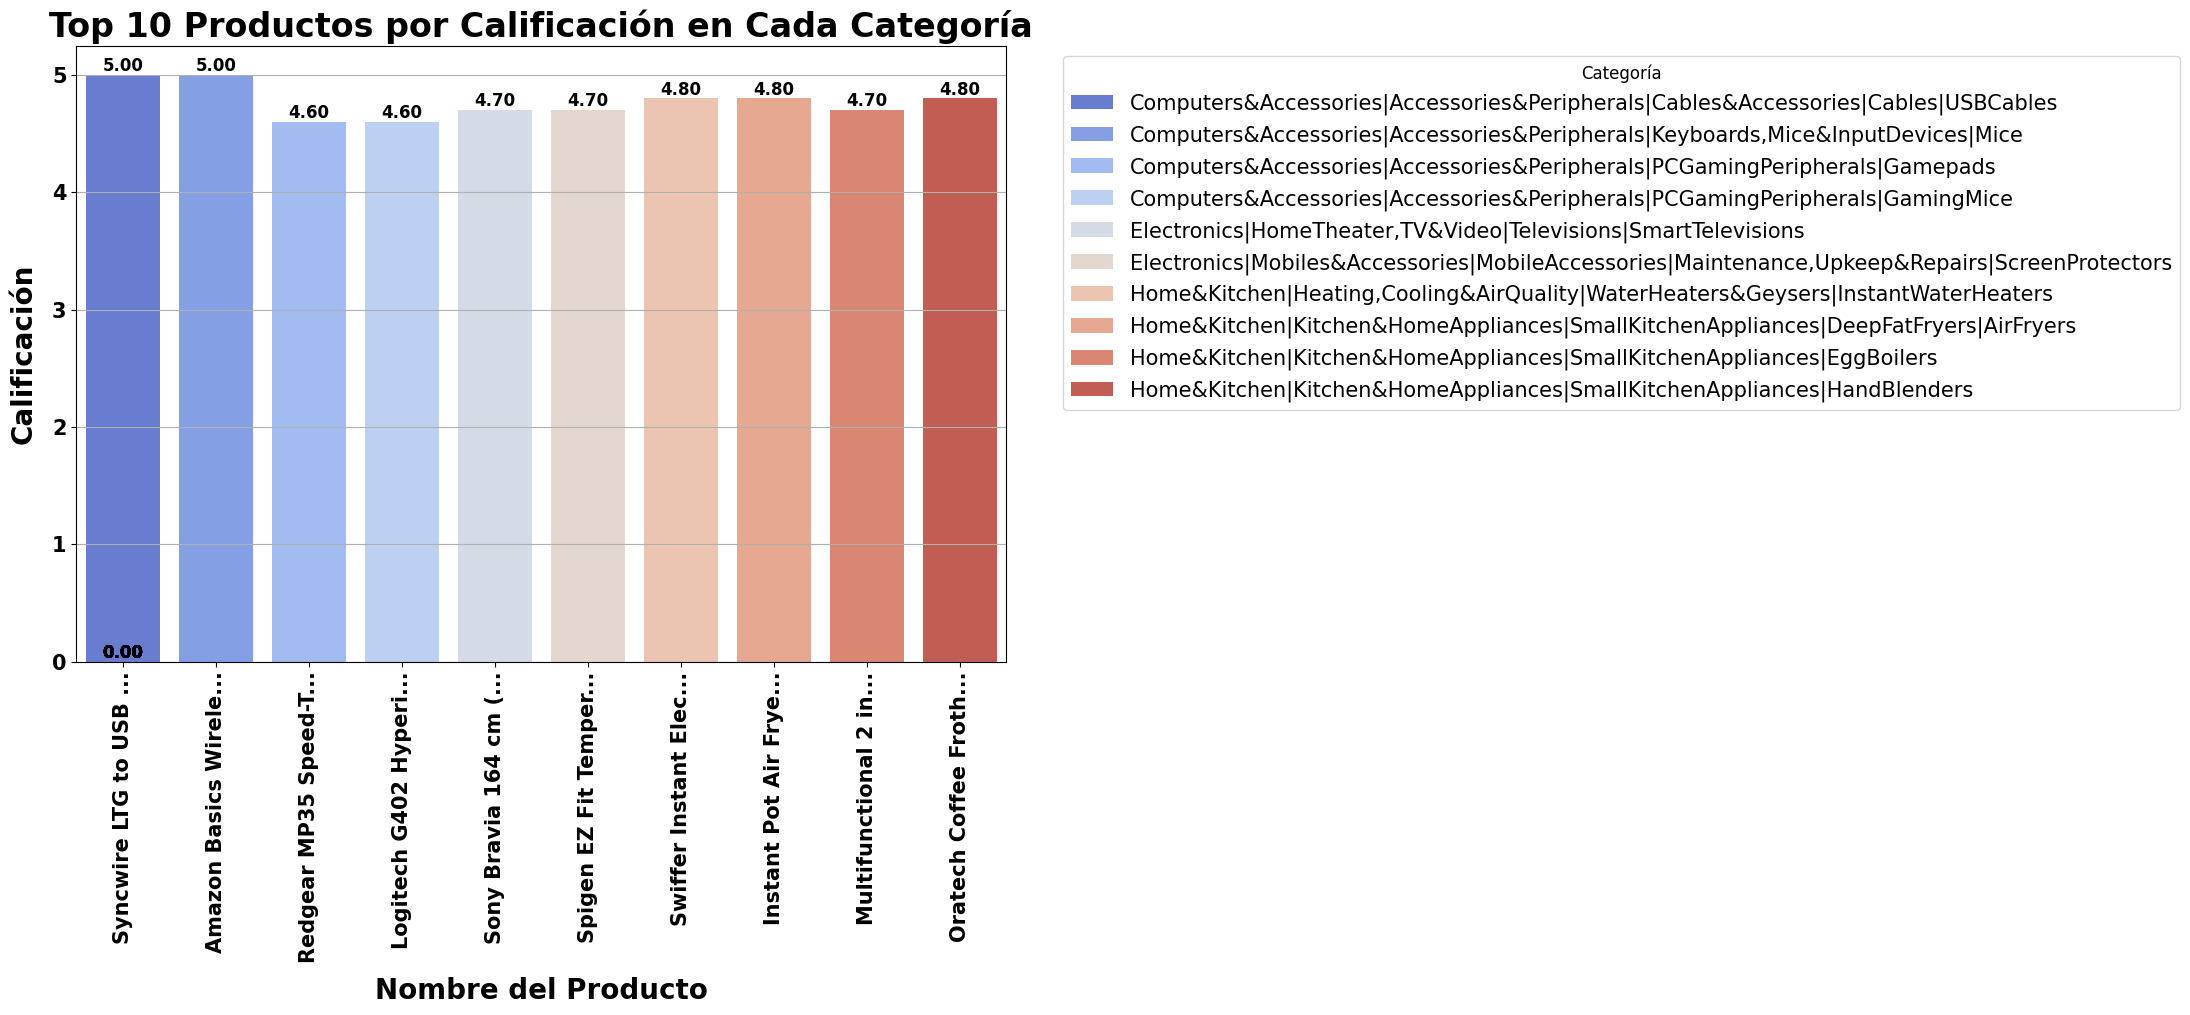

In [ ]:
# Identificar los productos con la mejor calificación (rating) en cada categoría
top_products_by_category = df.loc[df.groupby('category')['rating'].idxmax()]

# Seleccionar las columnas relevantes para mostrar
top_products_by_category = top_products_by_category[['category', 'product_id', 'product_name', 'rating']]

# Ordenar por rating y seleccionar los 10 productos con mayor calificación
top_10_products = top_products_by_category.nlargest(10, 'rating')

# Ordenar los resultados por categoría para una mejor visualización
top_10_products_sorted = top_10_products.sort_values(by='category')

# Crear una nueva columna para acortar los nombres de productos para una mejor visualización
top_10_products_sorted['short_product_name'] = top_10_products_sorted['product_name'].apply(
    lambda x: x[:20] + '...' if len(x) > 20 else x)

# Configurar las dimensiones de la gráfica
plt.figure(figsize=(12, 8))  # Ajusta el tamaño para la gráfica vertical

# Crear gráfico de barras con Seaborn usando paleta 'coolwarm'
barplot = sns.barplot(
    data=top_10_products_sorted,
    x='short_product_name',
    y='rating',
    hue='category',
    dodge=False,
    palette='coolwarm'  # Cambio aquí la paleta de colores
)

# Añadir título y etiquetas con formato destacado
plt.title('Top 10 Productos por Calificación en Cada Categoría', fontsize=24, fontweight='bold')
plt.ylabel('Calificación', fontsize=20, fontweight='bold', labelpad=10)
plt.xlabel('Nombre del Producto', fontsize=20, fontweight='bold', labelpad=10)

# Ajustar la leyenda (tamaño y posición)
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=15, title_fontsize=12)

# Mejorar visibilidad de las marcas del eje x y y
plt.xticks(fontsize=15, fontweight='bold', rotation=90)  # Rota etiquetas eje x para mejor lectura
plt.yticks(fontsize=15, fontweight='bold')

# Añadir etiquetas con el valor de cada barra encima de ellas
for p in barplot.patches:
    barplot.annotate(
        f'{p.get_height():.2f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='bottom',
        fontsize=12, fontweight='bold', color='black'
    )

# Mostrar rejilla solo en el eje y
plt.grid(axis='y')

# Ajustar el layout para evitar cortes en las etiquetas y mostrar gráfico
plt.tight_layout()
plt.show()


**Mostrar los Productos con Menor Calificación por Categoría**


In [ ]:
# Paso 1: Encontrar la calificación mínima para cada categoría
least_products_by_category = df.loc[df.groupby('category')['rating'].idxmin()]

# Paso 2: Seleccionar las columnas relevantes
least_products_by_category = least_products_by_category[['category', 'product_id', 'product_name', 'rating']]

# Paso 3: Ordenar por calificación y seleccionar los 10 productos con menor calificación
least_10_products = least_products_by_category.nsmallest(10, 'rating')

# Paso 4: Ordenar los resultados por categoría para una mejor visualización
least_10_products_sorted = least_10_products.sort_values(by='category')

# Mostrar el resultado
least_10_products_sorted


,category,product_id,product_name,rating
282,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,B0B94JPY2N,"Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black)",3.0
263,"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",B09F6D21BY,7SEVEN Compatible LG TV Remote Suitable for LG Non Magic Smart tv Remote Control (Mouse & Voice Non-Support) MR20GA Prime Video and Netflix Hotkeys,3.0
545,Electronics|WearableTechnology|SmartWatches,B0BBVKRP7B,SHREENOVA ID116 Plus Bluetooth Fitness Smart Watch for Men Women and Kids Activity Tracker (Black),2.8
1309,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|FanHeaters",B0BPJBTB3F,Khaitan ORFin Fan heater for Home and kitchen-K0 2215,2.0
1251,Home&Kitchen|Kitchen&HomeAppliances|SewingMachines&Accessories|Sewing&EmbroideryMachines,B08XLR6DSB,"akiara - Makes life easy Electric Handy Sewing/Stitch Handheld Cordless Portable White Sewing Machine for Home Tailoring, Hand Machine | Mini Silai | White Hand Machine with Adapter",3.1
1243,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders,B0BFBNXS94,"Personal Size Blender, Portable Blender, Battery Powered USB Blender, with Four Blades, Mini Blender Travel Bottle for Juice, Shakes, and Smoothies (Pink)",2.3
1286,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|JuicerMixerGrinders,B0BNDGL26T,"MR. BRAND Portable USB Juicer Electric USB Juice Maker Mixer Bottle Blender Grinder Mixer,6 Blades Rechargeable Bottle with (Multi color) (MULTI MIXER 6 BLED)",2.8
1314,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|Juicers,B08TT63N58,"ROYAL STEP - AMAZON'S BRAND - Portable Electric USB Juice Maker Juicer Bottle Blender Grinder Mixer,4 Blades Rechargeable Bottle with (Multi color) (MULTI)",3.1
1356,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|VacuumSealers,B0B7L86YCB,Green Tales Heat Seal Mini Food Sealer-Impulse Machine for Sealing Plastic Bags Packaging,2.6
1449,Home&Kitchen|Kitchen&HomeAppliances|WaterPurifiers&Accessories|WaterPurifierAccessories,B0BBLHTRM9,IONIX Tap filter Multilayer | Activated Carbon Faucet Water Filters Universal Interface Home Kitchen Faucet Tap Water Clean Purifier Filter Cartridge Five Layer Water Filter-Pack of 1,2.9


**Productos Mejor Calificados**

In [ ]:
# Identificar los productos con la calificación más alta en general
top_rated_products = df.sort_values(by='rating', ascending=False).head(10)

# Seleccionar columnas relevantes para mostrar
top_rated_products = top_rated_products[['category', 'product_id', 'product_name', 'rating']]

# Mostrar los 10 productos mejor calificados
top_rated_products

,category,product_id,product_name,rating
775,"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",B09ZHCJDP1,"Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop",5.0
174,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,B0BP7XLX48,"Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)",5.0
324,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,B0BQRJ3C47,"REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White",5.0
1299,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|DeepFatFryers|AirFryers,B0B53DS4TF,"Instant Pot Air Fryer, Vortex 2QT, Touch Control Panel, 360° EvenCrisp™ Technology, Uses 95 % less Oil, 4-in-1 Appliance: Air Fry, Roast, Bake, Reheat (Vortex 1.97Litre, Black)",4.8
1145,"Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters",B0BR4F878Q,"Swiffer Instant Electric Water Heater Faucet Tap Home-Kitchen Instantaneous Water Heater Tank less for Tap, LED Electric Head Water Heaters Tail Gallon Comfort(3000W) ((Pack of 1))",4.8
1201,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders,B0BQ3K23Y1,"Oratech Coffee Frother electric, milk frother electric, coffee beater, cappuccino maker, Coffee Foamer, Mocktail Mixer, Coffee Foam Maker, coffee whisker electric, Froth Maker, coffee stirrers electric, coffee frothers, Coffee Blender, (6 Month Warranty) (Multicolour)",4.8
1388,"Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters",B0BP89YBC1,Campfire Spring Chef Prolix Instant Portable Water Heater Geyser 1Ltr. for Use Home Stainless Steel Baking Rack | Restaurant | Office | Labs | Clinics | Saloon | with Installation Kit (With MCB),4.7
1223,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders,B0BM4KTNL1,"FIGMENT Handheld Milk Frother Rechargeable, 3-Speed Electric Frother for Coffee with 2 Whisks and Coffee Decoration Tool, Coffee Frother Mixer, CRESCENT ENTERPRISES VRW0.50BK (A1)",4.7
1275,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|EggBoilers,B0BM9H2NY9,Multifunctional 2 in 1 Electric Egg Boiling Steamer Egg Frying Pan Egg Boiler Electric Automatic Off with Egg Boiler Machine Non-Stick Electric Egg Frying Pan-Tiger Woods (Multy),4.7
1226,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|HandBlenders,B0BLC2BYPX,"Zuvexa USB Rechargeable Electric Foam Maker - Handheld Milk Wand Mixer Frother for Hot Milk, Hand Blender Coffee, Egg Beater (Black)",4.7


**Productos Mejor Calificados**

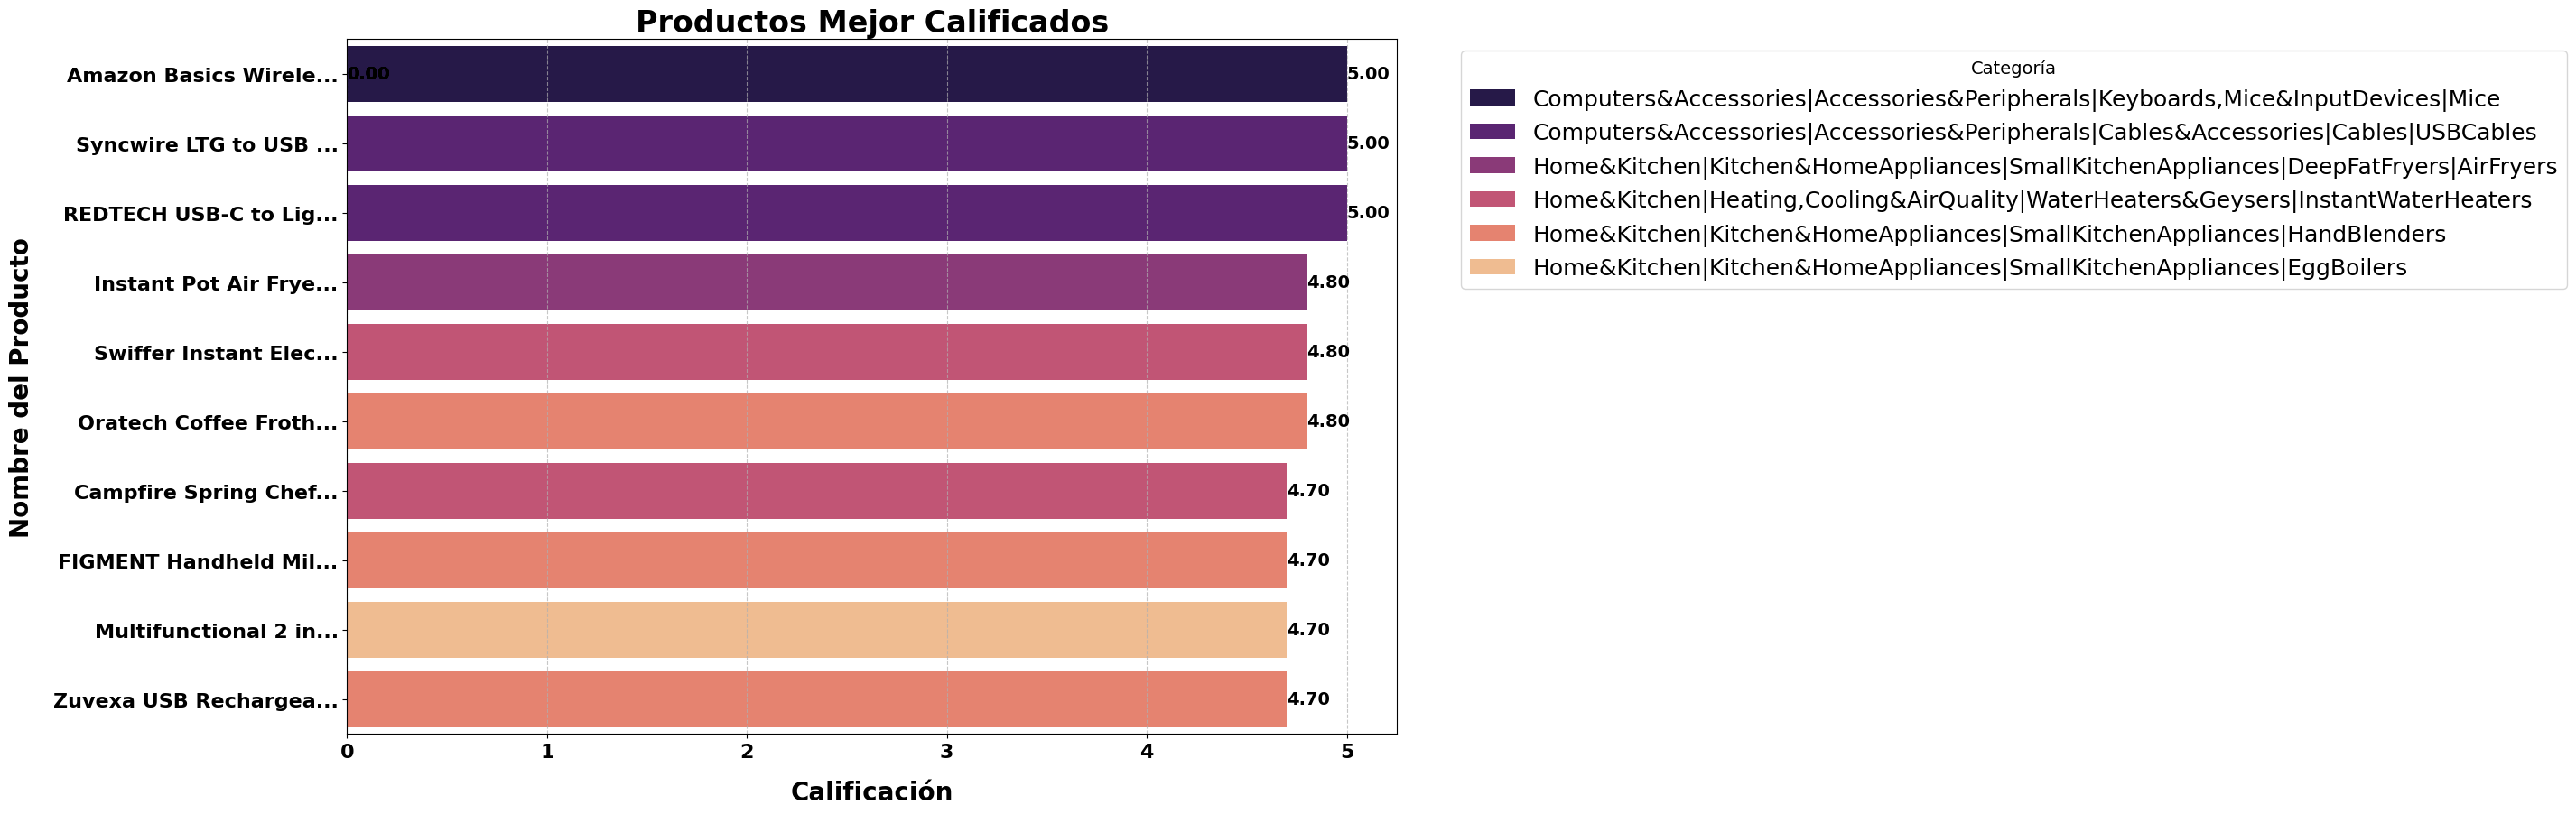

In [26]:
# Identificar los productos con la mejor calificación general
top_rated_products = df.sort_values(by='rating', ascending=False).head(10)

# Seleccionar las columnas relevantes
top_rated_products = top_rated_products[['category', 'product_id', 'product_name', 'rating']]

# Crear una nueva columna para acortar los nombres de los productos para mejor visualización
top_rated_products['short_product_name'] = top_rated_products['product_name'].apply(
    lambda x: x[:20] + '...' if len(x) > 20 else x
)

# Configurar el tamaño de la gráfica
plt.figure(figsize=(15, 10))

# Crear una paleta de colores basada en las categorías únicas
unique_categories = top_rated_products['category'].unique()
palette = sns.color_palette("magma", len(unique_categories))
category_color_map = dict(zip(unique_categories, palette))

# Crear un gráfico de barras horizontal con barras agrupadas por categoría
barplot = sns.barplot(
    data=top_rated_products,
    y='short_product_name',
    x='rating',
    hue='category',
    dodge=False,
    palette=category_color_map
)

# Añadir título y etiquetas con formato destacado
plt.title('Productos Mejor Calificados', fontsize=24, fontweight='bold')
plt.xlabel('Calificación', fontsize=20, fontweight='bold', labelpad=15)
plt.ylabel('Nombre del Producto', fontsize=20, fontweight='bold', labelpad=15)

# Ajustar tamaño y posición de la leyenda
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18, title_fontsize=14)

# Mejorar visibilidad de las marcas de los ejes
plt.xticks(fontsize=16, fontweight='bold')
plt.yticks(fontsize=16, fontweight='bold')

# Añadir etiquetas con el valor de cada barra a la derecha
for p in barplot.patches:
    barplot.annotate(
        f'{p.get_width():.2f}',
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha='left',
        va='center',
        fontsize=14,
        fontweight='bold',
        color='black'
    )

# Añadir cuadrícula en el eje x con líneas punteadas y algo de transparencia
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajustar el layout para evitar cortes y mostrar la gráfica
plt.tight_layout()
plt.show()


**Calificación Media según Rangos de Precio con Descuento**

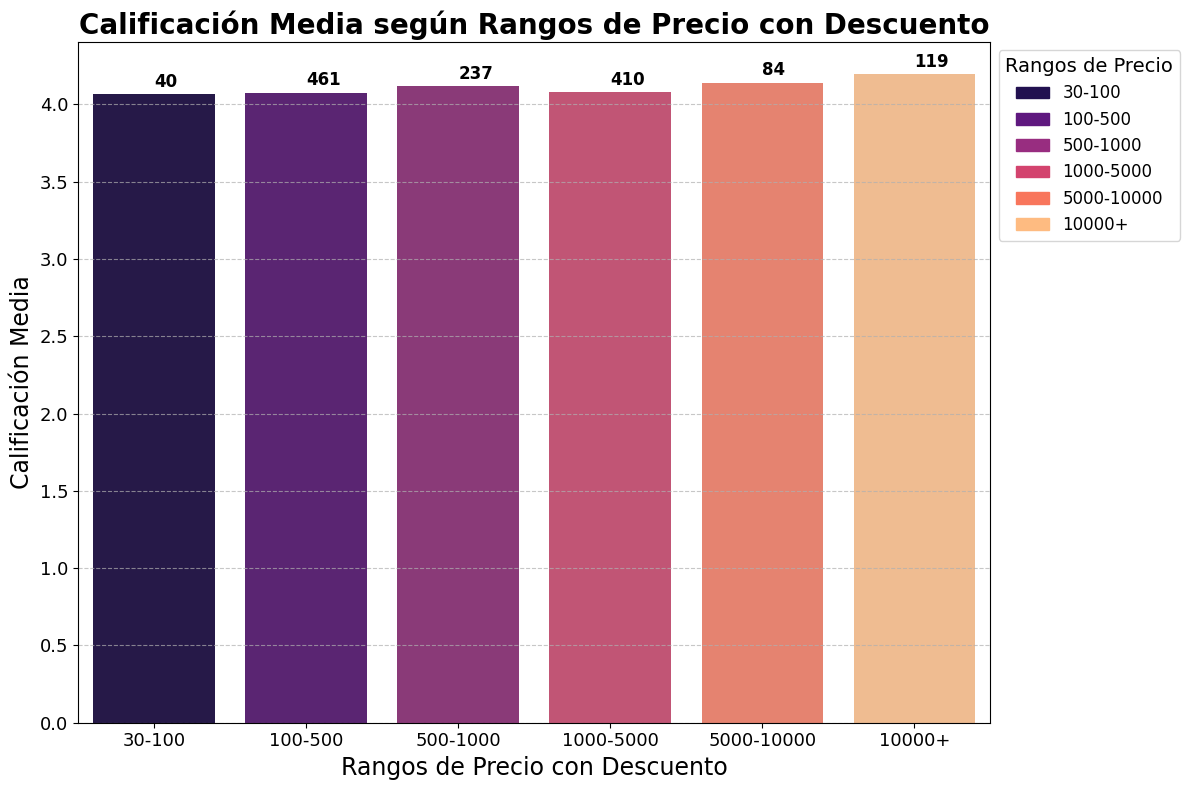

In [30]:
# Configurar estética del gráfico
plt.figure(figsize=(12, 8))

# Crear gráfico de barras para la calificación media usando la paleta 'magma'
bar_plot = sns.barplot(data=price_rating_analysis, x='price_range', y='mean_rating', palette='magma', capsize=0.1)

# Añadir etiquetas con el conteo de productos encima de cada barra
for index, row in price_rating_analysis.iterrows():
    plt.text(index, row['mean_rating'] + 0.05,
             f'{row["product_count"]}',
             fontsize=12,
             fontweight='bold',
             color='black')

# Título y etiquetas de los ejes
plt.title('Calificación Media según Rangos de Precio con Descuento', fontsize=20, fontweight='bold')
plt.xlabel('Rangos de Precio con Descuento', fontsize=17)
plt.ylabel('Calificación Media', fontsize=17)

# Mejorar visibilidad de marcas en los ejes
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)

# Mostrar líneas de cuadrícula en eje y para mejor lectura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Crear leyenda personalizada usando colores de la paleta 'magma'
from matplotlib.patches import Patch

# Obtener colores de la paleta para cada rango de precio
colors = sns.color_palette('magma', len(price_rating_analysis))
legend_labels = price_rating_analysis['price_range'].tolist()

# Crear parches para la leyenda
handles = [Patch(color=color, label=label) for color, label in zip(colors, legend_labels)]

# Añadir leyenda al gráfico
plt.legend(handles=handles, title='Rangos de Precio', fontsize=12, title_fontsize=14, loc='upper left', bbox_to_anchor=(1, 1))

# Ajustar el layout para que no se corten elementos y mostrar gráfico
plt.tight_layout()
plt.show()


**Calculo de Reseñas y Calificaciones por Producto**

In [31]:
# Crear un nuevo DataFrame para el análisis por categoría
category_product_counts = df.groupby('category').agg(
    product_count=('product_id', 'nunique'),  # Número de productos únicos por categoría
    total_reviews=('review_id', 'count'),     # Total de reseñas por categoría
    mean_rating=('rating', 'mean')             # Calificación media por categoría
).reset_index()

# Calcular la proporción de reseñas por producto
category_product_counts['reviews_per_product'] = category_product_counts['total_reviews'] / category_product_counts['product_count']

# Mostrar el análisis ordenado por la calificación media (de mayor a menor)
category_product_counts.sort_values(by='mean_rating', ascending=False, inplace=True)

# Filtrar las 10 categorías con mayor cantidad de productos
top_categories = category_product_counts.nlargest(10, 'product_count')

# Mostrar las 10 categorías principales ordenadas por total de reseñas (de mayor a menor)
top_categories.sort_values(by='total_reviews', ascending=False)


,category,product_count,total_reviews,mean_rating,reviews_per_product
10,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,161,233,4.151931,1.447205
119,Electronics|WearableTechnology|SmartWatches,62,76,4.025000,1.225806
117,Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68,68,4.100000,1.000000
97,"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",60,63,4.209524,1.050000
76,"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",51,52,3.898077,1.019608
93,"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",49,49,3.800000,1.000000
169,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders,27,27,4.011111,1.000000
18,"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",24,24,4.287500,1.000000
181,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|Irons|DryIrons",24,24,4.129167,1.000000
140,"Home&Kitchen|Heating,Cooling&AirQuality|WaterHeaters&Geysers|InstantWaterHeaters",23,23,4.052174,1.000000


**Principales Productos por Porcentaje de Calificación**

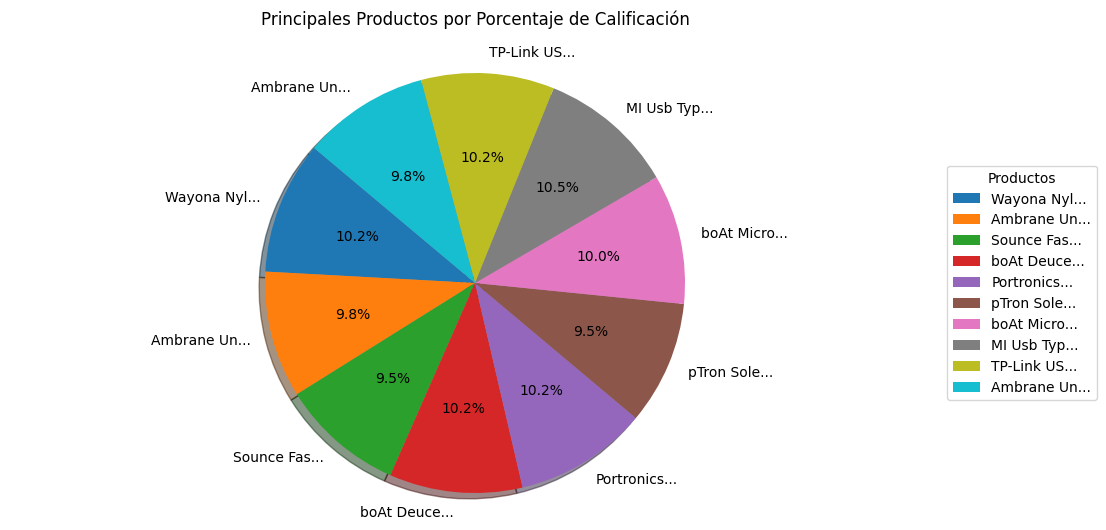

In [32]:
# Calcular el porcentaje de calificación
df['rating_percentage'] = (df['rating'] / 5) * 100

# Seleccionar los productos principales según el porcentaje de calificación para mayor claridad en el gráfico circular
top_products = df[['product_id', 'product_name', 'category', 'rating_percentage']].head(10)

# Crear una etiqueta concisa para la leyenda
top_products['label'] = top_products['product_name'].str[:10] + '...'  # Mostrar los primeros 10 caracteres con puntos suspensivos

# Graficar el gráfico circular con un tamaño de figura aumentado
plt.figure(figsize=(12, 6))  # Tamaño aumentado
plt.pie(top_products['rating_percentage'], labels=top_products['label'], autopct='%1.1f%%', startangle=140, shadow=True)

# Añadir título y leyenda con espacio
plt.title('Principales Productos por Porcentaje de Calificación', pad=20)  # Se añadió espacio para separación
plt.axis('equal')  # El aspecto igual asegura que el gráfico circular se dibuje como un círculo
plt.legend(top_products['label'], title='Productos', loc='center left', bbox_to_anchor=(1, 0, 0.5, 1))

# Mostrar el gráfico
plt.show()


**Productos y categorías con mayor porcentaje de calificación**

In [33]:
# Calcular el porcentaje de calificación
df['rating_percentage'] = (df['rating'] / 5) * 100

# Mostrar el DataFrame actualizado con la nueva columna
df[['product_id', 'product_name', 'category', 'rating', 'rating_percentage']].head()


,product_id,product_name,category,rating,rating_percentage
0,B07JW9H4J1,"Wayona Nylon Braided USB to Lightning Fast Charging and Data Sync Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini (3 FT Pack of 1, Grey)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,4.2,84.0
1,B098NS6PVG,"Ambrane Unbreakable 60W / 3A Fast Charging 1.5m Braided Type C Cable for Smartphones, Tablets, Laptops & other Type C devices, PD Technology, 480Mbps Data Sync, Quick Charge 3.0 (RCT15A, Black)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,4.0,80.0
2,B096MSW6CT,"Sounce Fast Phone Charging Cable & Data Sync USB Cable Compatible for iPhone 13, 12,11, X, 8, 7, 6, 5, iPad Air, Pro, Mini & iOS Devices",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,3.9,78.0
3,B08HDJ86NZ,"boAt Deuce USB 300 2 in 1 Type-C & Micro USB Stress Resistant, Tangle-Free, Sturdy Cable with 3A Fast Charging & 480mbps Data Transmission, 10000+ Bends Lifespan and Extended 1.5m Length(Martian Red)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,4.2,84.0
4,B08CF3B7N1,"Portronics Konnect L 1.2M Fast Charging 3A 8 Pin USB Cable with Charge & Sync Function for iPhone, iPad (Grey)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,4.2,84.0


**Principales categorías del conjunto de datos**

In [34]:
# 1. Contar el número de productos en cada categoría
category_counts = df['category'].value_counts()

# 2. Encontrar las 10 categorías con mayor cantidad de productos
top_10_categories = category_counts.nlargest(10)

# 3. Filtrar el DataFrame para incluir solo productos de estas 10 categorías principales
top_10_category_products = df[df['category'].isin(top_10_categories.index)]

# Mostrar los resultados
top_10_categories


,count
category,
Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,233
Electronics|WearableTechnology|SmartWatches,76
Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68
"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",63
"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52
"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",49
Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders,27
"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",24
"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",24


**Principales categorías por número de productos**

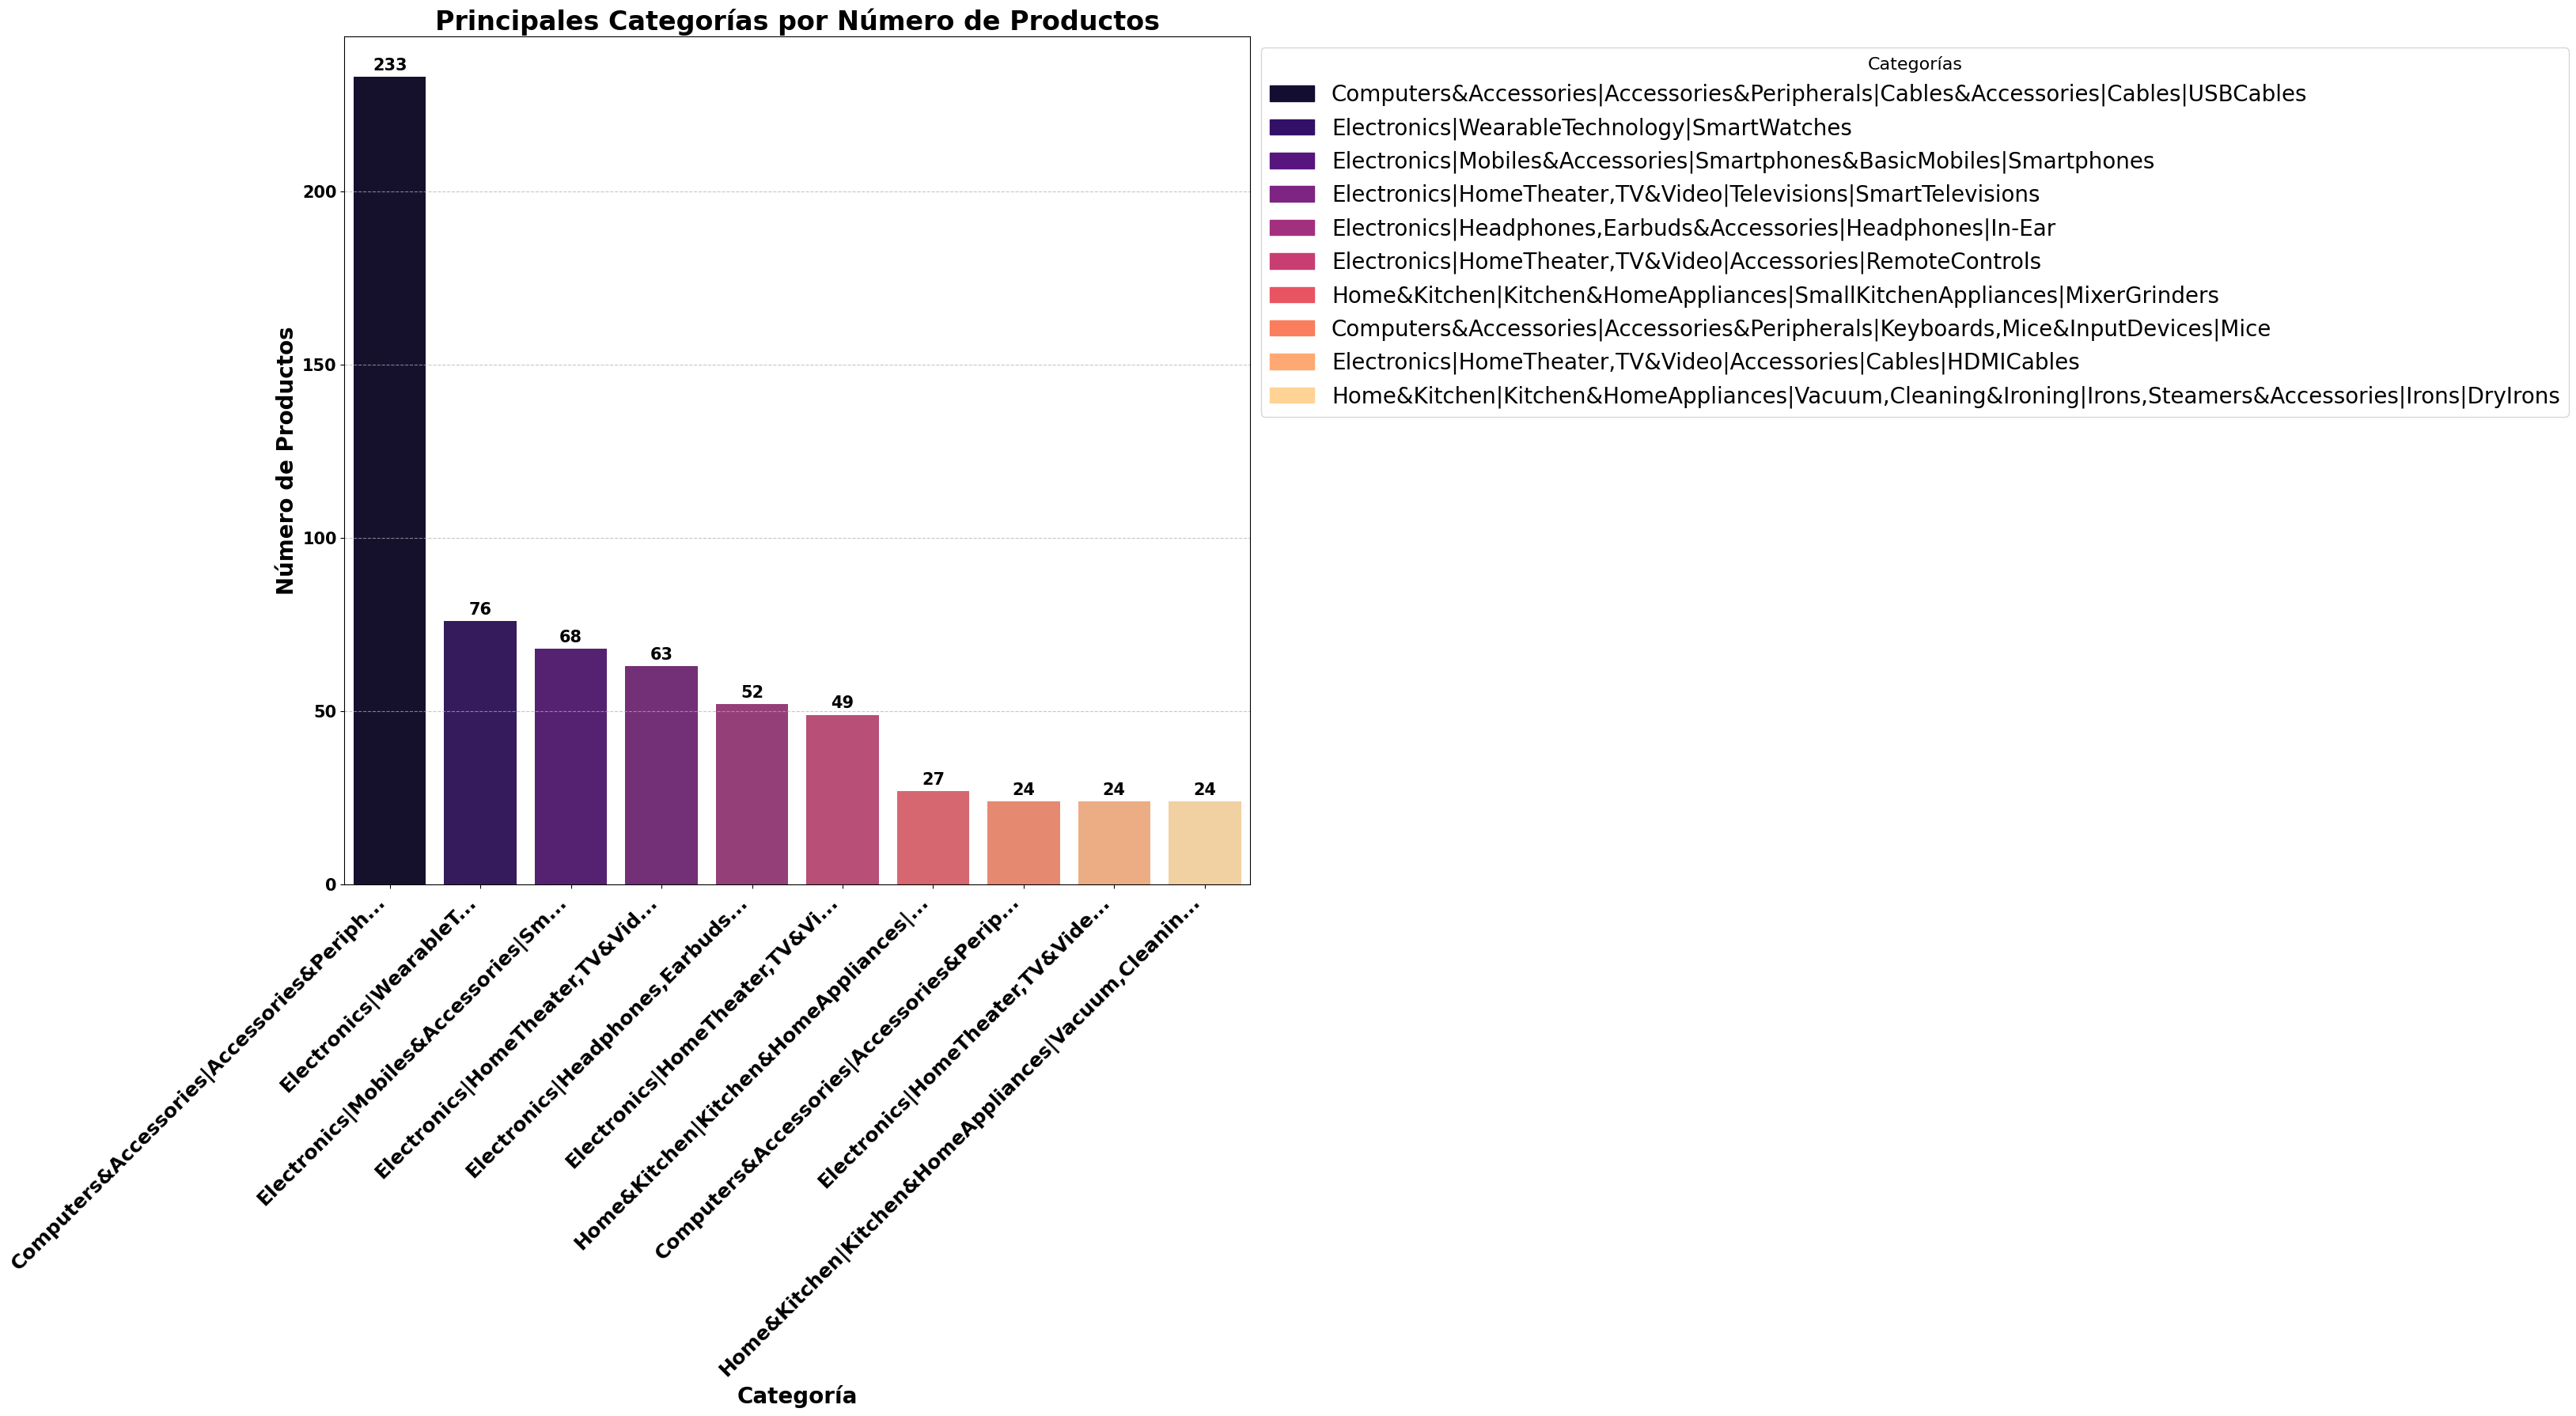

In [35]:
# Función para acortar los nombres de las categorías (toma la mitad y agrega puntos suspensivos)
def shorten_name(name):
    max_len = len(name) // 2  # Toma la mitad de la longitud del nombre
    return name[:max_len] + '...' if len(name) > 10 else name  # Acorta si el nombre es mayor a 10 caracteres

# Aplica la función para acortar los nombres de las categorías
shortened_categories = [shorten_name(category) for category in top_10_categories.index]

# Crea una paleta de colores basada en el número de categorías
colors = sns.color_palette('magma', len(top_10_categories))

# 1. Crea un gráfico de barras usando seaborn con la paleta de colores 'magma'
plt.figure(figsize=(32, 18))  # Aumenta el tamaño de la figura para mayor visibilidad
barplot = sns.barplot(y=top_10_categories.values, x=shortened_categories, palette=colors)

# 2. Añade etiquetas y título con fuente en negrita y tamaño grande
plt.xlabel('Categoría', fontsize=20, fontweight='bold')  # Etiqueta del eje X
plt.ylabel('Número de Productos', fontsize=20, fontweight='bold')  # Etiqueta del eje Y
plt.title('Principales Categorías por Número de Productos', fontsize=24, fontweight='bold')  # Título del gráfico

# 3. Anota cada barra con su valor (cantidad de productos) usando fuente más grande y en negrita
for i, value in enumerate(top_10_categories.values):
    plt.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=15, fontweight='bold')

# 4. Rota los nombres de las categorías para mejor legibilidad
plt.xticks(rotation=45, ha='right', fontsize=18, fontweight='bold')  # Rota y formatea etiquetas del eje X
plt.yticks(fontsize=15, fontweight='bold')  # Formato para etiquetas del eje Y

# 5. Crea una leyenda con los nombres completos y fuente grande
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[i]) for i in range(len(shortened_categories))]
plt.legend(handles, top_10_categories.index, title='Categorías', bbox_to_anchor=(1, 1), loc='upper left', fontsize=20, title_fontsize=16)

# 6. Añade líneas de rejilla horizontales para facilitar la lectura
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 7. Muestra el gráfico asegurando que todo encaje bien
plt.tight_layout()
plt.show()


**Calificaciones promedio por categoría**

In [36]:
# Agrupar los datos por categoría y calcular métricas relevantes
category_summary = df.groupby('category').agg(
    product_count=('product_id', 'count'),      # Total de productos por categoría
    average_rating=('rating', 'mean')           # Calificación promedio por categoría
).reset_index()  # Restablecer el índice para convertirlo en un DataFrame normal

# Ordenar las categorías según la cantidad de productos (de mayor a menor) y seleccionar las 10 principales
top_categories = category_summary.sort_values(by='product_count', ascending=False).head(10)

# Mostrar las categorías con más productos y sus calificaciones promedio
top_categories


,category,product_count,average_rating
10,Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,233,4.151931
119,Electronics|WearableTechnology|SmartWatches,76,4.025000
117,Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|Smartphones,68,4.100000
97,"Electronics|HomeTheater,TV&Video|Televisions|SmartTelevisions",63,4.209524
76,"Electronics|Headphones,Earbuds&Accessories|Headphones|In-Ear",52,3.898077
93,"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",49,3.800000
169,Home&Kitchen|Kitchen&HomeAppliances|SmallKitchenAppliances|MixerGrinders,27,4.011111
89,"Electronics|HomeTheater,TV&Video|Accessories|Cables|HDMICables",24,4.254167
181,"Home&Kitchen|Kitchen&HomeAppliances|Vacuum,Cleaning&Ironing|Irons,Steamers&Accessories|Irons|DryIrons",24,4.129167
18,"Computers&Accessories|Accessories&Peripherals|Keyboards,Mice&InputDevices|Mice",24,4.287500


**Top 10 Categorías por Calificación Promedio**

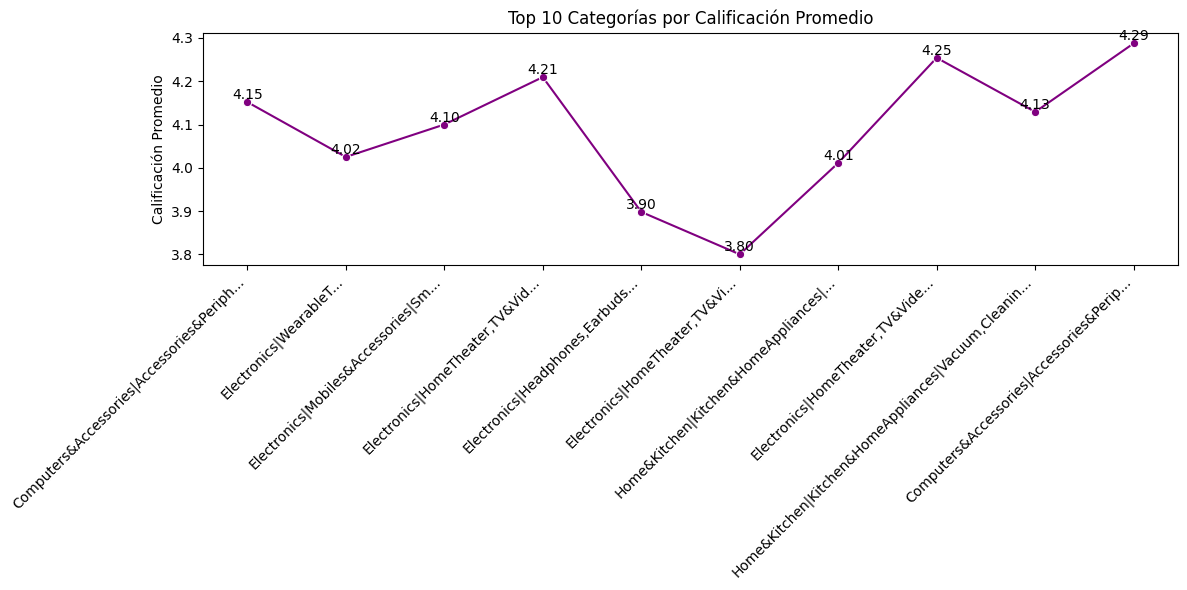

In [37]:
# Agrupar por categoría y calcular el número de productos y la calificación promedio
category_summary = df.groupby('category').agg(
    product_count=('product_id', 'count'),      # Contar cuántos productos hay en cada categoría
    average_rating=('rating', 'mean')           # Calcular la calificación promedio por categoría
).reset_index()

# Ordenar el resumen por número de productos en orden descendente y seleccionar las 10 principales categorías
top_categories = category_summary.sort_values(by='product_count', ascending=False).head(10)

# Acortar los nombres de las categorías (tomando la mitad del texto seguido de "...")
shortened_categories = [f"{cat[:len(cat)//2]}..." for cat in top_categories['category']]

# Crear un gráfico de líneas para mostrar las calificaciones promedio
plt.figure(figsize=(12, 6))
line_plot = sns.lineplot(x=shortened_categories, y='average_rating', data=top_categories, marker='o', color='purple')

# Añadir etiquetas con los valores de calificación en cada punto
for index, value in enumerate(top_categories['average_rating']):
    line_plot.text(index, value, f'{value:.2f}', color='black', ha='center', va='bottom')

# Definir etiquetas y título del gráfico
plt.ylabel('Calificación Promedio', color='black')
plt.title('Top 10 Categorías por Calificación Promedio')
plt.xticks(rotation=45, ha='right')

# Ajustar el diseño para que todo se vea correctamente
plt.tight_layout()
plt.show()


**Precio con Descuento y el Precio Original vs Porcentaje de Descuento**

In [38]:
# Crear una figura con dos gráficos de dispersión (scatterplots) en una sola fila y dos columnas
fig = make_subplots(rows=1, cols=2, subplot_titles=("Porcentaje de Descuento vs Precio con Descuento", "Porcentaje de Descuento vs Precio Original"))

# Obtener todas las categorías únicas
categories = df['category'].unique()

# Crear una paleta de colores basada en el estilo 'magma'
colors = sns.color_palette("magma", len(categories))  # Paleta de colores para las categorías

# Crear un diccionario que asocia cada categoría con un color en formato rgba (con opacidad)
color_map = {
    category: f'rgba({int(color[0] * 255)}, {int(color[1] * 255)}, {int(color[2] * 255)}, 0.7)'
    for category, color in zip(categories, colors)
}

# Abreviar nombres de categorías largos para que no saturen la leyenda
category_abbreviations = {
    category: category[:10] + '...' if len(category) > 10 else category
    for category in categories
}

# Primer gráfico: % de descuento vs precio con descuento
for category in categories:
    category_data = df[df['category'] == category]
    fig.add_trace(go.Scatter(
        x=category_data['discount_percentage'],  # Eje X: porcentaje de descuento
        y=category_data['discounted_price'],     # Eje Y: precio con descuento
        mode='markers',
        marker=dict(color=color_map[category], size=10),
        name=category_abbreviations[category],  # Nombre en la leyenda
        hoverinfo='text',
        hovertemplate=(
            f"<b>Categoría:</b> {category}<br>" +
            f"<b>% Descuento:</b> %{{x}}<br>" +
            f"<b>Precio con Descuento:</b> ₹%{{y}}<br>" +
            "<extra></extra>"
        )
    ), row=1, col=1)

# Segundo gráfico: % de descuento vs precio original
for category in categories:
    category_data = df[df['category'] == category]
    fig.add_trace(go.Scatter(
        x=category_data['discount_percentage'],  # Eje X: porcentaje de descuento
        y=category_data['actual_price'],         # Eje Y: precio original
        mode='markers',
        marker=dict(color=color_map[category], size=10),
        name=category_abbreviations[category],
        hoverinfo='text',
        hovertemplate=(
            f"<b>Categoría:</b> {category}<br>" +
            f"<b>% Descuento:</b> %{{x}}<br>" +
            f"<b>Precio Original:</b> ₹%{{y}}<br>" +
            "<extra></extra>"
        )
    ), row=1, col=2)

# Configurar el diseño general del gráfico
fig.update_layout(
    title_text="Porcentaje de Descuento vs Precios",
    showlegend=True,
    height=600,
    width=1000
)

# Etiquetas de los ejes para el primer gráfico
fig.update_xaxes(title_text="Porcentaje de Descuento", row=1, col=1)
fig.update_yaxes(title_text="Precio con Descuento", row=1, col=1, tickformat=".0f")  # Sin decimales

# Etiquetas de los ejes para el segundo gráfico
fig.update_xaxes(title_text="Porcentaje de Descuento", row=1, col=2)
fig.update_yaxes(title_text="Precio Original", row=1, col=2, tickformat=".0f")  # Sin decimales

# Mostrar el gráfico interactivo
fig.show()


**Análisis Descriptivo del Precio y la Calificación**

In [40]:
# 1. Estadísticas descriptivas
print("Estadísticas descriptivas:")
print(df[['actual_price', 'discounted_price', 'rating']].describe())

# 2. Análisis de correlación
correlation_actual = df['actual_price'].corr(df['rating'])
correlation_discounted = df['discounted_price'].corr(df['rating'])

print("\nCorrelación entre el precio original y la calificación:", correlation_actual)
print("Correlación entre el precio con descuento y la calificación:", correlation_discounted)


Estadísticas descriptivas:
        actual_price  discounted_price       rating
count    1465.000000       1465.000000  1465.000000
mean     5444.990635       3125.310874     4.096546
std     10874.826864       6944.304394     0.291578
min        39.000000         39.000000     2.000000
25%       800.000000        325.000000     4.000000
50%      1650.000000        799.000000     4.100000
75%      4295.000000       1999.000000     4.300000
max    139900.000000      77990.000000     5.000000

Correlación entre el precio original y la calificación: 0.121672970756719
Correlación entre el precio con descuento y la calificación: 0.12035456289817406


**Calificación promedio según el precio original y el precio con descuento**

In [41]:
# Definir rangos de precio para el precio original (actual_price)
price_bins_actual = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 139900.0]
price_labels_actual = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['actual_price_group'] = pd.cut(df['actual_price'], bins=price_bins_actual, labels=price_labels_actual)

# Calcular el rating promedio para cada grupo de precio original
average_rating_actual = df.groupby('actual_price_group')['rating'].mean().reset_index()
average_rating_actual.columns = ['Grupo de Precio Original', 'Calificación Promedio']

# Ordenar los grupos por calificación promedio de mayor a menor y quedarse con los 10 primeros
average_rating_actual = average_rating_actual.sort_values(by='Calificación Promedio', ascending=False).head(10)

# Definir rangos de precio para el precio con descuento (discounted_price)
price_bins_discounted = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 77990.0]
price_labels_discounted = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['discounted_price_group'] = pd.cut(df['discounted_price'], bins=price_bins_discounted, labels=price_labels_discounted)

# Calcular el rating promedio para cada grupo de precio con descuento
average_rating_discounted = df.groupby('discounted_price_group')['rating'].mean().reset_index()
average_rating_discounted.columns = ['Grupo de Precio con Descuento', 'Calificación Promedio']

# Filtrar para mantener solo los grupos que tienen nombre (no nulos)
average_rating_discounted = average_rating_discounted[average_rating_discounted['Grupo de Precio con Descuento'].notnull()]

# Mostrar los resultados
print("\nCalificación Promedio por Grupo de Precio Original:")
print(average_rating_actual)

print("\nCalificación Promedio por Grupo de Precio con Descuento:")
print(average_rating_discounted)



Calificación Promedio por Grupo de Precio Original:
  Grupo de Precio Original  Calificación Promedio
5                   10000+               4.178836
0                   30-100               4.121429
2                 500-1000               4.090031
3                1000-5000               4.087131
4               5000-10000               4.074242
1                  100-500               4.071359

Calificación Promedio por Grupo de Precio con Descuento:
  Grupo de Precio con Descuento  Calificación Promedio
0                        30-100               4.064444
1                       100-500               4.075330
2                      500-1000               4.117063
3                     1000-5000               4.077355
4                    5000-10000               4.141667
5                        10000+               4.195082


**Visualización de la Calificación Promedio según el Precio Original y con Descuento**

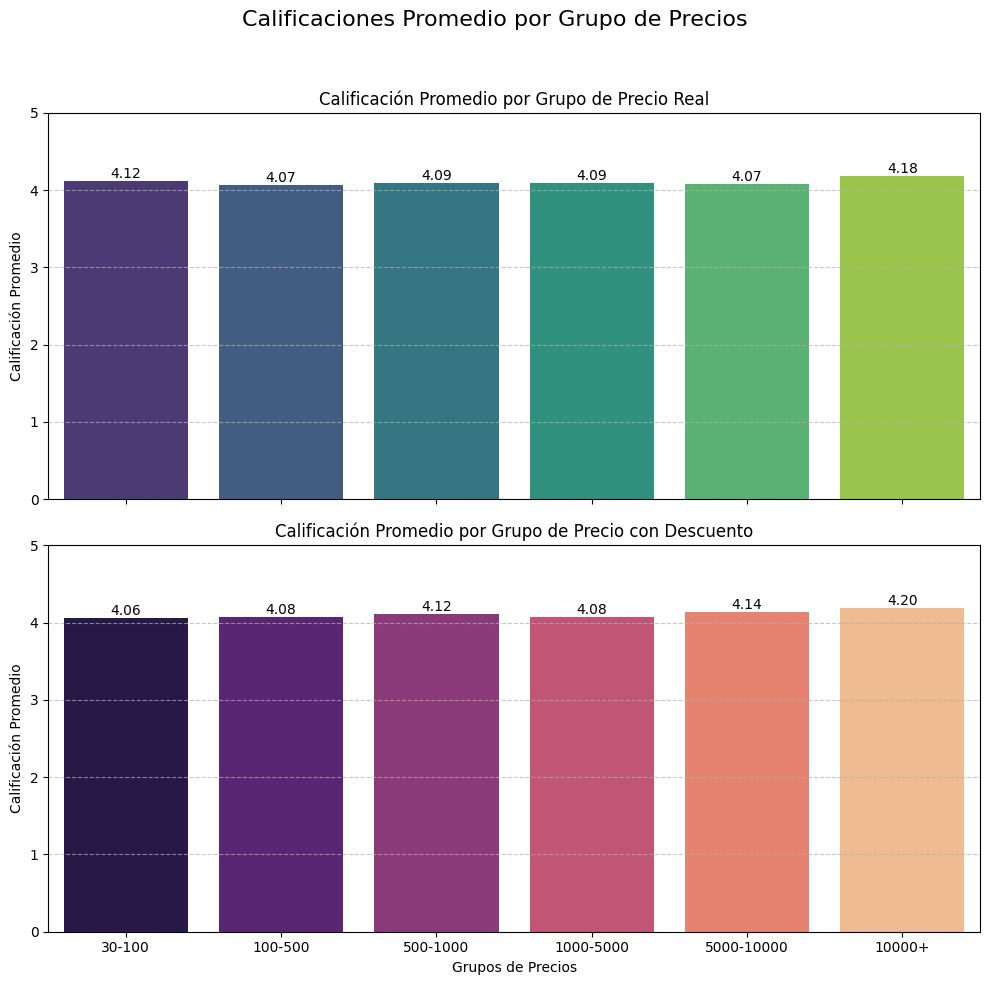

In [45]:
# Definir rangos de precios para los precios reales con nuevos mínimos y máximos
actual_price_bins = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 139900.0]  # Rangos personalizados para precios reales
actual_price_labels = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['actual_price_group'] = pd.cut(df['actual_price'], bins=actual_price_bins, labels=actual_price_labels)

# Calcular el promedio de calificaciones por grupo de precio real
average_rating_actual = df.groupby('actual_price_group')['rating'].mean().reset_index()
average_rating_actual.columns = ['Grupo de Precio Real', 'Calificación Promedio']

# Ordenar los grupos de precio real por calificación promedio
average_rating_actual = average_rating_actual.sort_values(by='Calificación Promedio', ascending=False)

# Definir rangos de precios para los precios con descuento con nuevos mínimos y máximos
discounted_price_bins = [30.0, 100.0, 500.0, 1000.0, 5000.0, 10000.0, 77990.0]  # Rangos personalizados para precios con descuento
discounted_price_labels = ['30-100', '100-500', '500-1000', '1000-5000', '5000-10000', '10000+']
df['discounted_price_group'] = pd.cut(df['discounted_price'], bins=discounted_price_bins, labels=discounted_price_labels)

# Calcular el promedio de calificaciones por grupo de precio con descuento
average_rating_discounted = df.groupby('discounted_price_group')['rating'].mean().reset_index()
average_rating_discounted.columns = ['Grupo de Precio con Descuento', 'Calificación Promedio']

# Mantener solo los grupos que tienen nombre (no nulos)
average_rating_discounted = average_rating_discounted[average_rating_discounted['Grupo de Precio con Descuento'].notnull()]

# Configurar la figura y los subgráficos de matplotlib
fig, axes = plt.subplots(2, 1, figsize=(10, 10), sharex=True)
fig.suptitle('Calificaciones Promedio por Grupo de Precios', fontsize=16)

# Gráfico para los grupos de precios reales
bar_actual = sns.barplot(ax=axes[0], x='Grupo de Precio Real', y='Calificación Promedio', data=average_rating_actual, palette='viridis')
axes[0].set_title('Calificación Promedio por Grupo de Precio Real')
axes[0].set_ylabel('Calificación Promedio')
axes[0].set_ylim(0, 5)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de valores sobre las barras del gráfico de precios reales
for p in bar_actual.patches:
    axes[0].annotate(f'{p.get_height():.2f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom')

# Gráfico para los grupos de precios con descuento
bar_discounted = sns.barplot(ax=axes[1], x='Grupo de Precio con Descuento', y='Calificación Promedio', data=average_rating_discounted, palette='magma')
axes[1].set_title('Calificación Promedio por Grupo de Precio con Descuento')
axes[1].set_ylabel('Calificación Promedio')
axes[1].set_ylim(0, 5)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Agregar etiquetas de valores sobre las barras del gráfico de precios con descuento
for p in bar_discounted.patches:
    axes[1].annotate(f'{p.get_height():.2f}',
                     (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='bottom')

# Mostrar el gráfico
plt.xlabel('Grupos de Precios')
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar el diseño para dejar espacio al título principal
plt.show()


**Visualización del Efecto del Precio Original y con Descuento sobre las Calificaciones**

In [46]:
# Crear subgráficos (subplots)
fig = make_subplots(rows=1, cols=2, subplot_titles=('Precio Real vs Calificación', 'Precio con Descuento vs Calificación'))

# Definir colores más oscuros
actual_price_color = 'rgba(75, 0, 130, 0.8)'  # Púrpura oscuro
discounted_price_color = 'rgba(255, 20, 147, 0.8)'  # Rosa oscuro

# Gráfico de dispersión para Precio Real vs Calificación
fig.add_trace(
    go.Scatter(
        x=df['actual_price'],  # Eje X: Precio real
        y=df['rating'],        # Eje Y: Calificación
        mode='markers',        # Tipo de gráfico: dispersión con puntos
        marker=dict(size=10, color=actual_price_color),  # Tamaño y color del marcador
        name='Precio Real'
    ),
    row=1, col=1
)

# Gráfico de dispersión para Precio con Descuento vs Calificación
fig.add_trace(
    go.Scatter(
        x=df['discounted_price'],  # Eje X: Precio con descuento
        y=df['rating'],            # Eje Y: Calificación
        mode='markers',
        marker=dict(size=10, color=discounted_price_color),
        name='Precio con Descuento'
    ),
    row=1, col=2
)

# Actualizar el diseño del gráfico
fig.update_layout(
    title_text='Efecto del Precio Real y con Descuento en las Calificaciones',
    height=500,
    width=1000,
    showlegend=True  # Mostrar leyenda
)

# Formato de los ejes X para mostrar los valores originales (sin notación científica)
fig.update_xaxes(tickformat='f', row=1, col=1)  # Para el precio real
fig.update_xaxes(tickformat='f', row=1, col=2)  # Para el precio con descuento

# Títulos de los ejes Y
fig.update_yaxes(title_text='Calificación', row=1, col=1)
fig.update_yaxes(title_text='Calificación', row=1, col=2)

# Mostrar el gráfico
fig.show()


**Mostrar los Productos con Mayor Calificación Promedio**

In [47]:
# Paso 1: Agrupar por product_id y calcular la calificación promedio
avg_ratings = df.groupby('product_id')['rating'].mean()

# Paso 2: Ordenar las calificaciones promedio de forma descendente y obtener las 10 mejores
top_10_avg_ratings = avg_ratings.nlargest(10)

# Paso 3: Obtener los nombres de productos correspondientes a esos product_id
top_10_products = df[df['product_id'].isin(top_10_avg_ratings.index)]

# Paso 4: Crear un DataFrame para mostrarlo más fácilmente
top_10_product_info = top_10_products[['product_id', 'product_name']].drop_duplicates().set_index('product_id')
top_10_product_info['average_rating'] = top_10_avg_ratings.values

# Mostrar los resultados con texto específico
print("Top 10 Productos con Mayor Calificación Promedio:")
for product_id, row in top_10_product_info.iterrows():
    print(f"ID del Producto: {product_id} - Nombre del Producto: {row['product_name']} - Calificación Promedio: {row['average_rating']:.1f}")

# Imprimir IDs de productos y sus calificaciones promedio por separado
print("\nIDs de Productos y sus Calificaciones Promedio:")
for product_id in top_10_product_info.index:
    avg_rating = top_10_product_info.loc[product_id, 'average_rating']
    print(f"ID del Producto: {product_id} - Calificación Promedio: {avg_rating:.1f}")


Top 10 Productos con Mayor Calificación Promedio:
ID del Producto: B0BP7XLX48 - Nombre del Producto: Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White) - Calificación Promedio: 5.0
ID del Producto: B09WN3SRC7 - Nombre del Producto: Sony Bravia 164 cm (65 inches) 4K Ultra HD Smart LED Google TV KD-65X74K (Black) - Calificación Promedio: 5.0
ID del Producto: B0BQRJ3C47 - Nombre del Producto: REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White - Calificación Promedio: 5.0
ID del Producto: B0B23LW7NV - Nombre del Producto: Spigen EZ Fit Tempered Glass Screen Protector for iPhone 14 Pro Max - 2 Pack (Sensor Protection) - Calificación Promedio: 4.8
ID del Producto: B09ZHCJDP1 - Nombre del Producto: Amazon Basics Wireless Mouse | 2.4 

**Productos con Menor Calificación Promedio**

In [50]:
# Paso 1: Agrupar por product_id y calcular la calificación promedio
avg_ratings = df.groupby('product_id')['rating'].mean()

# Paso 2: Ordenar las calificaciones promedio de forma ascendente y obtener las 10 más bajas
least_10_avg_ratings = avg_ratings.nsmallest(10)

# Paso 3: Obtener los nombres de productos correspondientes a esos product_id
least_10_products = df[df['product_id'].isin(least_10_avg_ratings.index)]

# Paso 4: Crear un DataFrame para mostrarlo más fácilmente
least_10_product_info = least_10_products[['product_id', 'product_name']].drop_duplicates().set_index('product_id')
least_10_product_info['average_rating'] = least_10_avg_ratings.values

# Mostrar los resultados con texto específico
print("10 Productos con Menor Calificación Promedio:")
for product_id, row in least_10_product_info.iterrows():
    print(f"ID del Producto: {product_id} - Nombre del Producto: {row['product_name']} - Calificación Promedio: {row['average_rating']:.1f}")

# Imprimir IDs de productos y sus calificaciones promedio por separado
print("\nIDs de Productos y sus Calificaciones Promedio:")
for product_id in least_10_product_info.index:
    avg_rating = least_10_product_info.loc[product_id, 'average_rating']
    print(f"ID del Producto: {product_id} - Calificación Promedio: {avg_rating:.1f}")


10 Productos con Menor Calificación Promedio:
ID del Producto: B09F6D21BY - Nombre del Producto: 7SEVEN Compatible LG TV Remote Suitable for LG Non Magic Smart tv Remote Control (Mouse & Voice Non-Support) MR20GA Prime Video and Netflix Hotkeys - Calificación Promedio: 2.0
ID del Producto: B0B94JPY2N - Nombre del Producto: Amazon Brand - Solimo 65W Fast Charging Braided Type C to C Data Cable | Suitable For All Supported Mobile Phones (1 Meter, Black) - Calificación Promedio: 2.3
ID del Producto: B0BBVKRP7B - Nombre del Producto: SHREENOVA ID116 Plus Bluetooth Fitness Smart Watch for Men Women and Kids Activity Tracker (Black) - Calificación Promedio: 2.6
ID del Producto: B0B82YGCF6 - Nombre del Producto: Tokdis MX-1 Pro Bluetooth Calling Smartwatch - 1.69” LCD Display, Multiple Watch Faces, Sleep Monitor, Heart & SpO2 Monitoring, Multiple Sports Modes, Water Resistant - Calificación Promedio: 2.8
ID del Producto: B0BFBNXS94 - Nombre del Producto: Personal Size Blender, Portable Blende

**Mostrar los Productos con Menor Calificación Promedio**

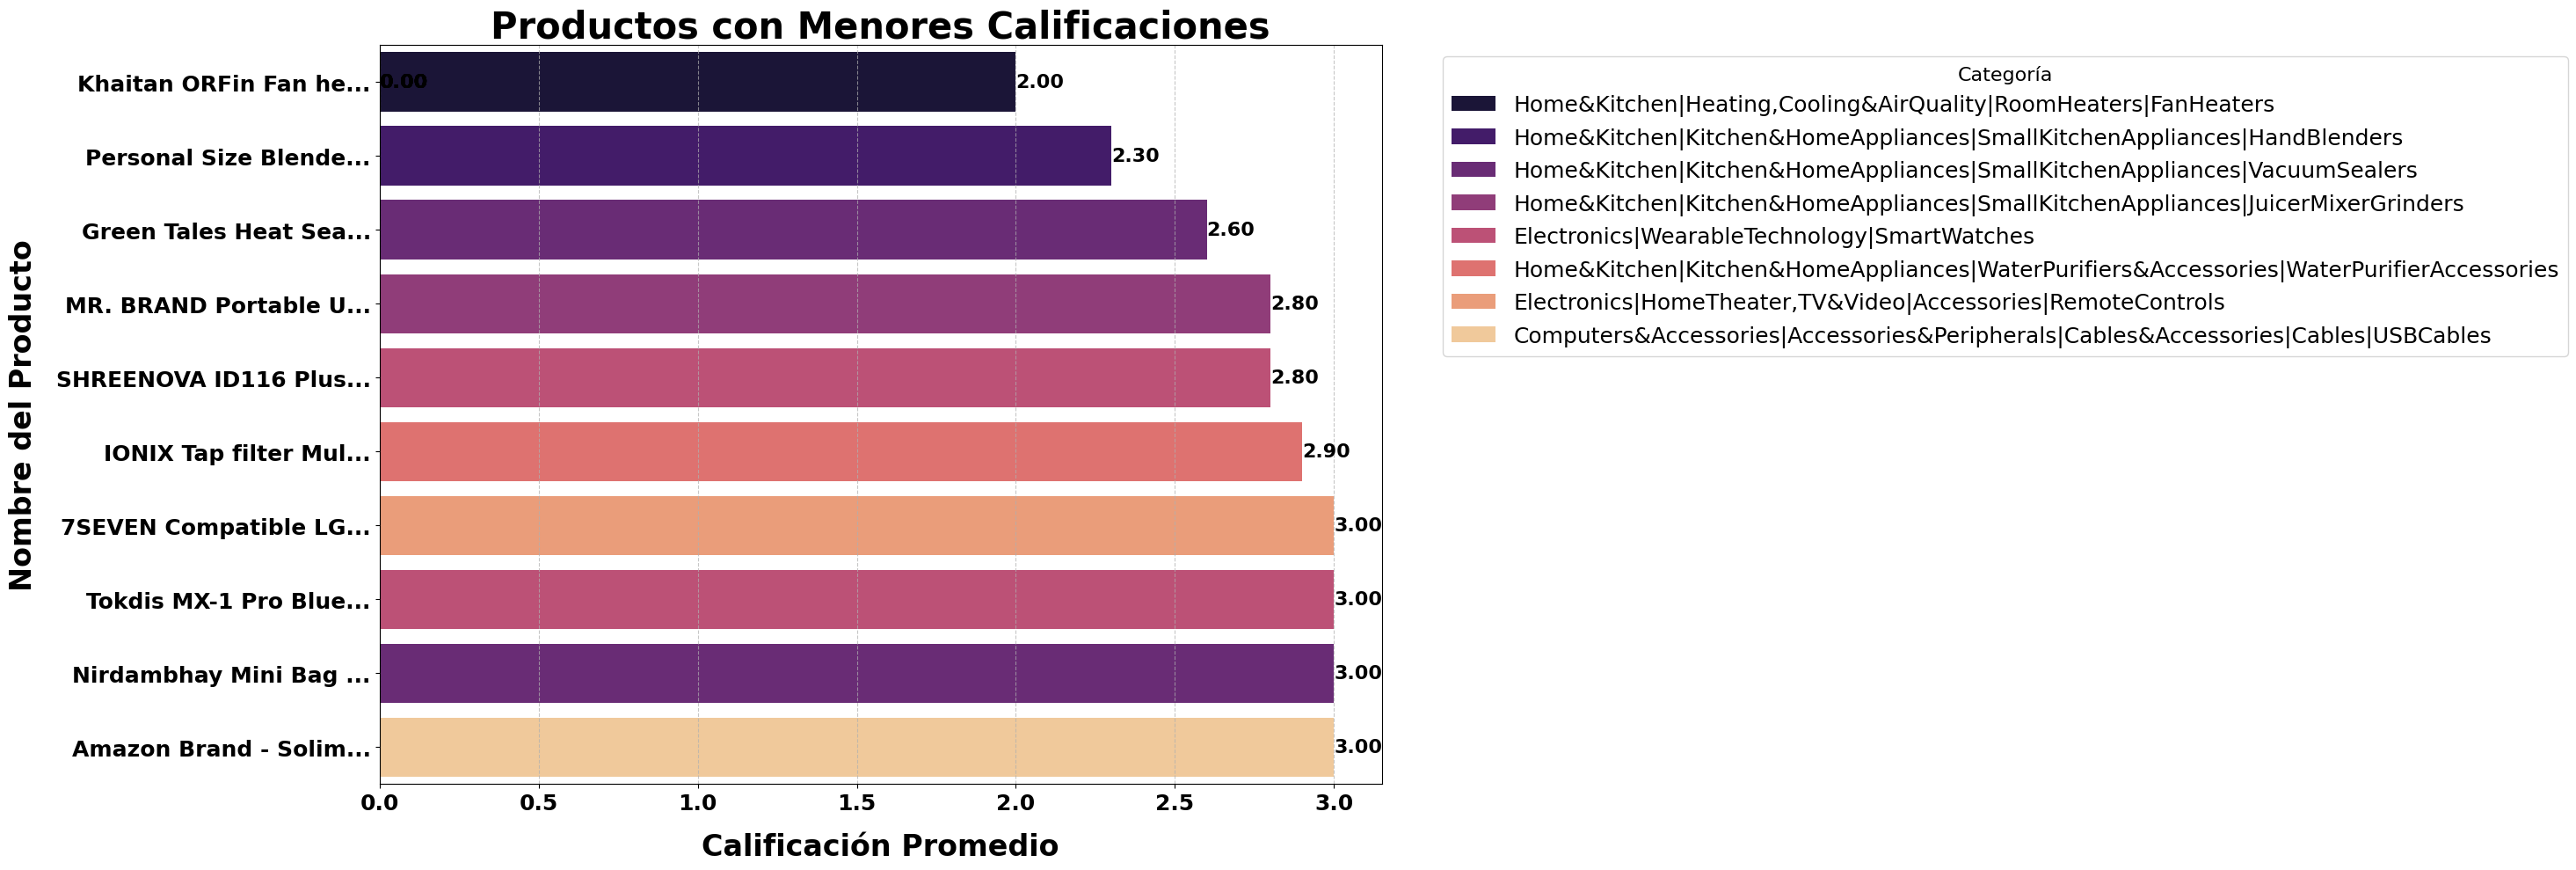

In [51]:
# Identificar los productos con la menor calificación general
least_rated_products = df.sort_values(by='rating').head(10)

# Seleccionar las columnas relevantes
least_rated_products = least_rated_products[['category', 'product_id', 'product_name', 'rating']]

# Crear una nueva columna con nombres de producto abreviados para el gráfico
least_rated_products['short_product_name'] = least_rated_products['product_name'].apply(lambda x: x[:20] + '...' if len(x) > 20 else x)

# Establecer los parámetros estéticos del gráfico con un tamaño aumentado
plt.figure(figsize=(30, 10))  # Aumentar el tamaño del gráfico

# Crear una paleta de colores basada en las categorías únicas
unique_categories = least_rated_products['category'].unique()
palette = sns.color_palette("magma", len(unique_categories))
category_color_map = dict(zip(unique_categories, palette))

# Crear un gráfico de barras horizontal (no apilado) con colores por categoría
barplot = sns.barplot(
    data=least_rated_products,
    y='short_product_name',
    x='rating',
    hue='category',
    dodge=False,
    palette=category_color_map
)

# Agregar títulos y etiquetas con mayor tamaño y énfasis
plt.title('Productos con Menores Calificaciones', fontsize=30, fontweight='bold')
plt.xlabel('Calificación Promedio', fontsize=24, fontweight='bold', labelpad=15)
plt.ylabel('Nombre del Producto', fontsize=24, fontweight='bold', labelpad=15)

# Ajustar el tamaño y posición de la leyenda
plt.legend(title='Categoría', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=18, title_fontsize=16)

# Hacer los valores de los ejes más destacados
plt.xticks(fontsize=18, fontweight='bold')
plt.yticks(fontsize=18, fontweight='bold')

# Agregar etiquetas de valor a cada barra
for p in barplot.patches:
    barplot.annotate(
        f'{p.get_width():.2f}',
        (p.get_width(), p.get_y() + p.get_height() / 2),
        ha='left', va='center',
        fontsize=16, fontweight='bold', color='black'
    )

# Agregar una cuadrícula al eje X
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Ajustar el diseño y mostrar el gráfico
plt.tight_layout()
plt.show()


#### **Análisis de Correlación**

In [52]:
# Seleccionar columnas numéricas para el análisis de correlación
numerical_columns = [
    'discounted_price',      # Precio con descuento
    'actual_price',          # Precio original
    'discount_percentage',   # Porcentaje de descuento
    'rating',                # Calificación
    'rating_count'           # Cantidad de calificaciones
]

# Calcular la matriz de correlación
correlation_matrix = df[numerical_columns].corr(method='pearson')  # También puedes usar 'kendall' o 'spearman'

# Mostrar la matriz de correlación
print("\nMatriz de Correlación:")
correlation_matrix



Matriz de Correlación:


,discounted_price,actual_price,discount_percentage,rating,rating_count
discounted_price,1.000000,0.961915,-0.242412,0.120355,-0.027095
actual_price,0.961915,1.000000,-0.118098,0.121673,-0.035974
discount_percentage,-0.242412,-0.118098,1.000000,-0.155065,0.011127
rating,0.120355,0.121673,-0.155065,1.000000,0.102148
rating_count,-0.027095,-0.035974,0.011127,0.102148,1.000000


In [53]:
# Seleccionar columnas numéricas para el análisis de correlación
numerical_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
correlation_matrix = df[numerical_cols].corr()

# Imprimir la matriz de correlación
print("\nMatriz de Correlación:")
correlation_matrix



Matriz de Correlación:


,discounted_price,actual_price,discount_percentage,rating,rating_count
discounted_price,1.000000,0.961915,-0.242412,0.120355,-0.027095
actual_price,0.961915,1.000000,-0.118098,0.121673,-0.035974
discount_percentage,-0.242412,-0.118098,1.000000,-0.155065,0.011127
rating,0.120355,0.121673,-0.155065,1.000000,0.102148
rating_count,-0.027095,-0.035974,0.011127,0.102148,1.000000


**Mapa de Calor de Correlaciones**

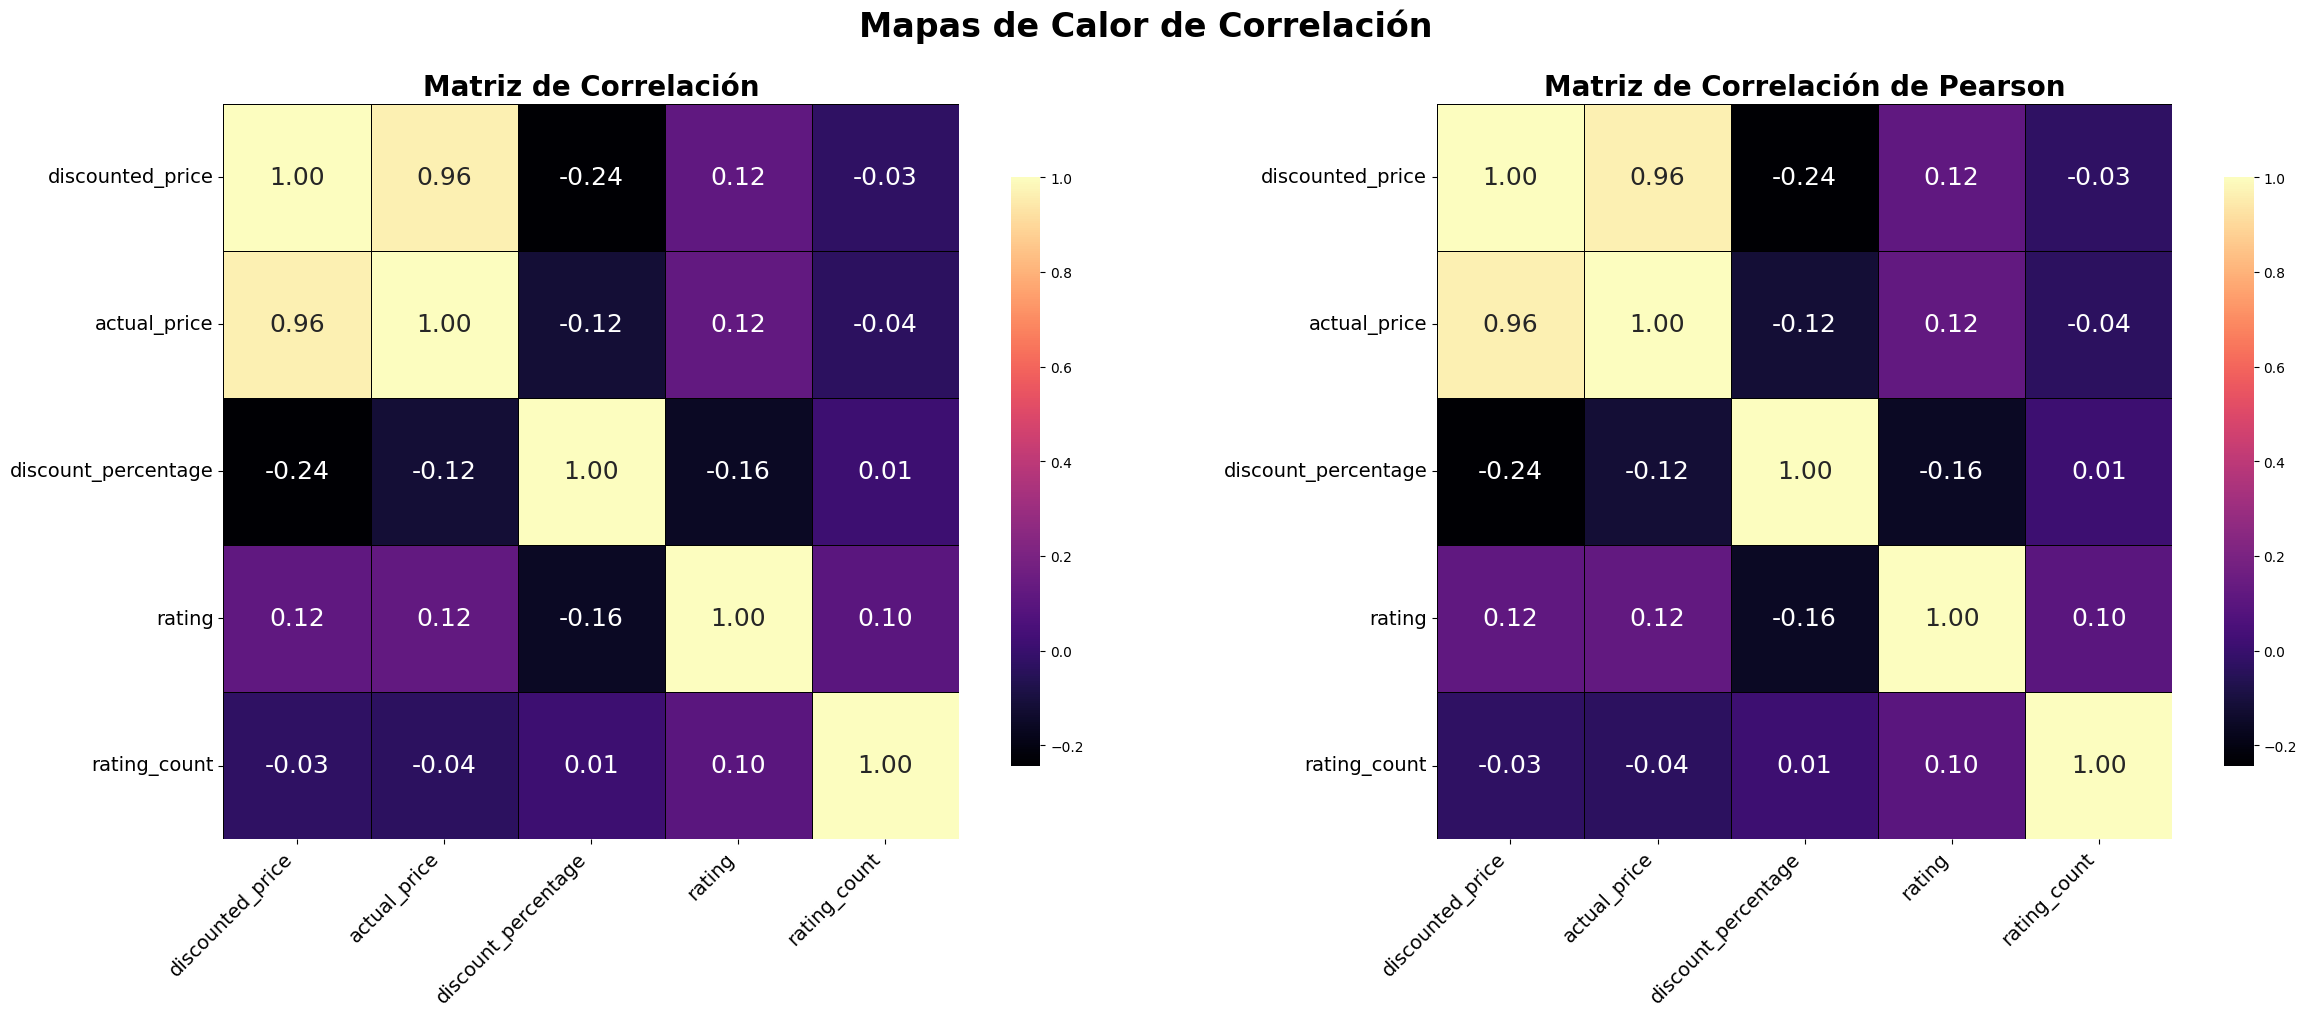

In [54]:
# Seleccionar columnas numéricas para el análisis de correlación
numerical_cols = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
correlation_matrix = df[numerical_cols].corr()

# Configurar la figura y los subgráficos de matplotlib
fig, axes = plt.subplots(1, 2, figsize=(25, 10))
fig.suptitle('Mapas de Calor de Correlación', fontsize=24, fontweight='bold')  # Título principal más grande

# Crear el mapa de calor para la matriz de correlación general
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='magma', square=True,
            annot_kws={"size": 18},  # Tamaño de fuente aumentado para los valores anotados
            cbar_kws={"shrink": .8}, ax=axes[0], linewidths=0.5, linecolor='black')
axes[0].set_title('Matriz de Correlación', fontsize=20, fontweight='bold')  # Título del primer gráfico
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)
axes[0].set_yticklabels(axes[0].get_yticklabels(), rotation=0, fontsize=14)

# Crear el mismo mapa de calor para enfatizar que es con Pearson (aunque ya lo es por defecto)
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='magma', square=True,
            annot_kws={"size": 18},  # Tamaño de fuente aumentado para los valores anotados
            cbar_kws={"shrink": .8}, ax=axes[1], linewidths=0.5, linecolor='black')
axes[1].set_title("Matriz de Correlación de Pearson", fontsize=20, fontweight='bold')
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=14)
axes[1].set_yticklabels(axes[1].get_yticklabels(), rotation=0, fontsize=14)

# Mostrar el gráfico
plt.tight_layout(rect=[0, 0, 1, 0.95])  # Ajustar el diseño para dejar espacio al título principal
plt.show()


In [55]:
!python -m textblob.download_corpora


[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Unzipping corpora/brown.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Unzipping corpora/conll2000.zip.
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Unzipping corpora/movie_reviews.zip.
Finished.


#### **Análisis de Sentimientos**

In [56]:
# Función para clasificar el sentimiento
def get_sentiment(review):
    analysis = TextBlob(review)
    # La polaridad varía de -1 (negativo) a 1 (positivo)
    if analysis.sentiment.polarity > 0:
        return 'Positivo'
    elif analysis.sentiment.polarity < 0:
        return 'Negativo'
    else:
        return 'Neutro'

# Suponiendo que 'review_content' contiene las reseñas de productos
# Aplicar la función de sentimiento a la columna 'review_content'
df['sentiment'] = df['review_content'].apply(get_sentiment)

# Opcional: Contar el número de reseñas en cada categoría de sentimiento
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

# Función para obtener las n palabras más frecuentes
def get_top_words(reviews, n=10):
    # Tokenizar y limpiar las palabras
    words = re.findall(r'\w+', reviews.lower())  # Extraer palabras y convertir a minúsculas
    # Contar la frecuencia de las palabras


sentiment
Positivo    1438
Negativo      26
Neutro         1
Name: count, dtype: int64


**Visualización de los Sentimientos Positivos, Negativos y Neutros**

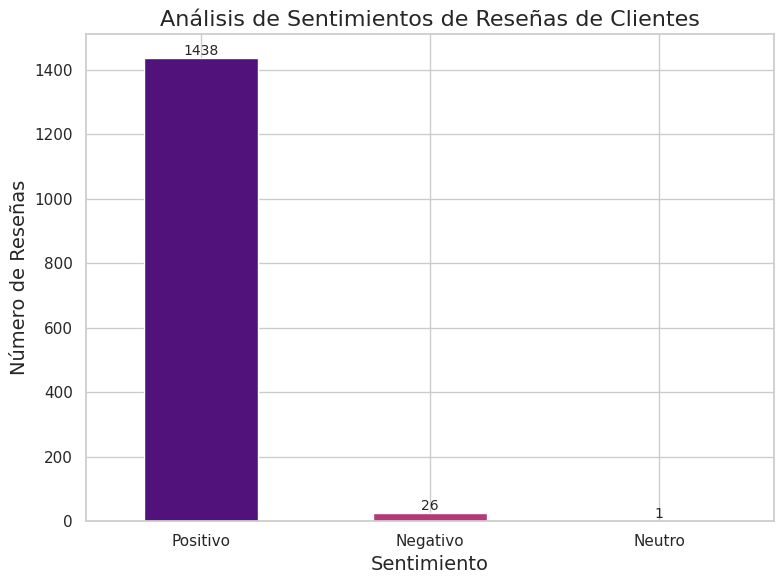

In [57]:
# Datos de ejemplo para el conteo de sentimientos (reemplaza con tus datos reales)
sentiment_counts = pd.Series({'Positivo': 1438, 'Negativo': 26, 'Neutro': 1})

# Configurar el estilo y la paleta de colores de seaborn
sns.set(style='whitegrid')
palette = sns.color_palette("magma", n_colors=len(sentiment_counts))

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
bars = sentiment_counts.plot(kind='bar', color=palette)

# Añadir títulos y etiquetas
plt.title('Análisis de Sentimientos de Reseñas de Clientes', fontsize=16)
plt.xlabel('Sentimiento', fontsize=14)
plt.ylabel('Número de Reseñas', fontsize=14)
plt.xticks(rotation=0)

# Añadir valores sobre las barras
for bar in bars.patches:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        int(bar.get_height()),  # Mostrar valor entero
        ha='center',
        va='bottom',  # Posicionar encima de la barra
        fontsize=10
    )

# Mostrar el gráfico
plt.tight_layout()
plt.show()


**Porcentajes de Sentimientos**

In [59]:
# Función para obtener la polaridad del sentimiento
def obtener_sentimiento(resena):
    return TextBlob(resena).sentiment.polarity

# Aplicar la función a la columna de contenido de reseñas
df['sentimiento'] = df['review_content'].apply(obtener_sentimiento)

# Clasificar el sentimiento según la polaridad
df['etiqueta_sentimiento'] = df['sentimiento'].apply(lambda x: 'Positivo' if x > 0 else ('Negativo' if x < 0 else 'Neutro'))

# Resumir los resultados en porcentaje
resumen_sentimiento = df['etiqueta_sentimiento'].value_counts(normalize=True) * 100

# Mostrar los resultados con porcentajes
print("Porcentaje de etiquetas de sentimiento (Porcentaje de reseñas):")
for etiqueta, porcentaje in resumen_sentimiento.items():
    print(f"{etiqueta}: {porcentaje:.2f}%")

# Visualizar la distribución de sentimientos con título actualizado
fig = px.pie(resumen_sentimiento, values=resumen_sentimiento.values, names=resumen_sentimiento.index,
             title='Porcentaje de etiquetas de sentimiento en reseñas de clientes')
fig.show()


Porcentaje de etiquetas de sentimiento (Porcentaje de reseñas):
Positivo: 98.16%
Negativo: 1.77%
Neutro: 0.07%


#


<h2 style="
  font-family: 'Segoe UI', sans-serif;
  font-size: 28px;
  font-weight: bold;
  text-align: center;
  background: linear-gradient(90deg, #ff6a00, #ee0979, #8e2de2, #4a00e0);
  -webkit-background-clip: text;
  -webkit-text-fill-color: transparent;
  color: transparent;
">
  Sistema de Recomendación
</h2>


#### **Recomendación de Productos**

**ID de Usuario con Calificaciones Más Bajas**

In [67]:
# Calcular la calificación promedio para cada usuario
average_rating_per_user = df.groupby('user_id')['rating'].mean()

# Encontrar el usuario con la calificación promedio más baja
lowest_rated_user_id = average_rating_per_user.idxmin()
lowest_average_rating = average_rating_per_user.min()

# Mostrar los resultados
print(f"ID del usuario con la calificación promedio más baja: {lowest_rated_user_id}")
print(f"Calificación promedio más baja: {lowest_average_rating:.2f}")


ID del usuario con la calificación promedio más baja: AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ
Calificación promedio más baja: 2.00


In [68]:
# Paso 1: Calcular las calificaciones promedio para cada usuario
user_avg_ratings = df.groupby('user_id')['rating'].mean()

# Paso 2: Ordenar las calificaciones promedio y obtener las más bajas
lowest_avg_ratings = user_avg_ratings.nsmallest(5)

# Paso 3: Encontrar los IDs de usuarios asociados con las calificaciones promedio más bajas
users_with_lowest_avg_rating = lowest_avg_ratings.index.tolist()

# Mostrar los resultados
print("Calificaciones Promedio Más Bajas:")
for user_id, avg_rating in lowest_avg_ratings.items():
    print(f"ID de Usuario: {user_id}, Calificación Promedio: {avg_rating:.2f}")

print(f"\nID(s) de Usuario con las Calificaciones Promedio Más Bajas: {users_with_lowest_avg_rating}")


Calificaciones Promedio Más Bajas:
ID de Usuario: AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ, Calificación Promedio: 2.00
ID de Usuario: AHRDA66XO63XYCBZJMW4EUJN3BFQ,AELE2SOO7LBNHXU7UK5F7TGQHA6Q,AHAVCLRCPYO2MFYPTURF33N7XH5A,AE762UDUDQPW4R4QHHTIL7TPTJUA,AEGZSJIUSKF2EKIKGLNKY2CU6WXA, Calificación Promedio: 2.30
ID de Usuario: AG2BB3Q2AQB7SBFBURGYSMFHDAOA,AGFXIO346VXYI35ANHRTU7FE7ZGA,AEZIOFC5L34FZZOMGKEHXHLG6KQA,AFDS7H2OSIL3I4CZBN7C7NS4XOXA,AEBSIJDEVFVOC7PQYB3W36OLAHNA,AGHY5MD6U2E57UWJTNGFKKQ5KROA,AF23NVMNXHKORCJCQPGAW6PSXMPA,AHSOUBG4CYVABTQRPHI64FAU4NLQ, Calificación Promedio: 2.60
ID de Usuario: AEJKHGA26MUVUZIYWZOW4B6I4X7Q,AF3B47EOSBULYG63EGZZZGO6HTNA,AGNSXRFJBDVGM7FS7YYPNCEO7XFQ,AHR53IW5LAAXGGFK3DRWRMXMM7KQ,AE5W6S5KCJV6L2WMBIOKYWQJN37Q,AH5J4DROVHI6XHMTCBAK7WWU3F4Q,AE5KAK3S3XZDPRUR2VCND2QNZTUQ,AEKG7ELYA43YNPZ2YT3ORIL2VSOA, Calificación Promedio: 2.80
ID de Usuario: AHSYI7EUDN2RNS2IPMGAS5MKLXPQ,AHHLJNBYVOGQSFG2Q4UMMRU3V3UA,AFC7PJA3XS6MHXYAUF3JZDHDUZWQ,AFL6U5G4P2KLLZU4HCOX

**ID de Producto con Calificación Promedio Más Baja**

In [69]:
# Crear una matriz usuario-producto
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')

# Calcular la similitud entre usuarios usando similitud coseno
user_similarity = cosine_similarity(user_item_matrix.fillna(0))
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Definir el ID de usuario con la calificación promedio más alta
user_id = 'AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ'

# Obtener los usuarios similares más cercanos
similar_users = user_similarity_df[user_id].nlargest(5).index.tolist()

# Reemplazar ceros con NaN para ignorarlos en el cálculo del promedio
user_item_matrix_no_zeros = user_item_matrix.replace(0, np.nan)

# Calcular las calificaciones promedio más bajas entre los usuarios similares (excluyendo ceros)
recommended_products = user_item_matrix_no_zeros.loc[similar_users].mean().nsmallest(5).dropna()

# Convertir a DataFrame para mejor legibilidad
recommended_products_df = pd.DataFrame(recommended_products, columns=['calificación_promedio'])
recommended_products_df.index.name = 'product_id'
recommended_products_df.reset_index(inplace=True)

# Mostrar los productos recomendados basados en las calificaciones más bajas de usuarios similares
print("Productos recomendados basados en las calificaciones más bajas de usuarios similares:")
print(recommended_products_df)


Productos recomendados basados en las calificaciones más bajas de usuarios similares:
   product_id  calificación_promedio
0  B0BPJBTB3F                    2.0
1  B09V2PZDX8                    4.0
2  B09V2Q4QVQ                    4.0
3  B09YDFDVNS                    4.0
4  B09YDFKJF8                    4.0


**Productos con Calificación Más Baja y su Categoría**

In [70]:
# Crear una matriz de interacción usuario-producto
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')

# Rellenar los valores NaN con 0 (o usar otra estrategia si se desea)
user_item_matrix.fillna(0, inplace=True)

# Calcular la similitud entre usuarios usando similitud coseno
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Función para obtener recomendaciones de productos para un usuario dado, enfocándose en las calificaciones más bajas
def not_recommend_lowest_rated_products(user_id, num_recommendations=5):
    # Obtener usuarios similares al usuario dado
    similar_users = user_similarity_df[user_id].nlargest(6).index.tolist()  # Obtener los 5 usuarios más similares

    # Obtener las calificaciones usuario-producto de estos usuarios similares
    similar_users_ratings = user_item_matrix.loc[similar_users]

    # Calcular la media de calificaciones de usuarios similares, considerando solo productos calificados
    similar_users_ratings_non_zero = similar_users_ratings.replace(0, np.nan)  # Reemplazar 0 con NaN para calcular la media
    recommended_products = similar_users_ratings_non_zero.mean().nsmallest(num_recommendations).dropna()

    # Convertir a DataFrame para mejor legibilidad
    recommended_products_df = pd.DataFrame(recommended_products, columns=['calificación_promedio'])
    recommended_products_df.index.name = 'product_id'
    recommended_products_df.reset_index(inplace=True)

    # Combinar con el DataFrame original para obtener detalles de los productos
    recommendations_with_details = recommended_products_df.merge(
        df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage']],
        on='product_id',
        how='left'
    )

    # Obtener el nombre del usuario para el user_id dado
    user_name = df.loc[df['user_id'] == user_id, 'user_name'].unique()

    # Agregar el nombre del usuario al DataFrame de recomendaciones
    recommendations_with_details['user_name'] = user_name[0] if user_name.size > 0 else 'Desconocido'

    return recommendations_with_details

# Ejemplo de uso
# Reemplazar con un user_id real de su conjunto de datos
user_id = 'AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ'
recommended_items = not_recommend_lowest_rated_products(user_id)

print(f"Productos NO recomendados para el usuario: {user_id} (Nombre de usuario: {recommended_items['user_name'].iloc[0]})")
recommended_items


Productos NO recomendados para el usuario: AGHT3K4KSG5MAQUSXRDT5VNB73GA,AE4Q5XQ7SZW35EEUJKQ3IV2IIBQQ (Nombre de usuario: Manidipa Sengupta,Vidisha)


,product_id,calificación_promedio,product_name,category,discounted_price,actual_price,discount_percentage,user_name
0,B0BPJBTB3F,2.0,Khaitan ORFin Fan heater for Home and kitchen-K0 2215,"Home&Kitchen|Heating,Cooling&AirQuality|RoomHeaters|FanHeaters",1299.0,2495.0,48,"Manidipa Sengupta,Vidisha"
1,B09V2PZDX8,4.0,"Nokia 105 Single SIM, Keypad Mobile Phone with Wireless FM Radio | Blue",Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|BasicMobiles,1299.0,1599.0,19,"Manidipa Sengupta,Vidisha"
2,B09V2Q4QVQ,4.0,"Nokia 105 Single SIM, Keypad Mobile Phone with Wireless FM Radio | Charcoal",Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|BasicMobiles,1299.0,1599.0,19,"Manidipa Sengupta,Vidisha"
3,B09YDFDVNS,4.0,"Nokia 105 Plus Single SIM, Keypad Mobile Phone with Wireless FM Radio, Memory Card Slot and MP3 Player | Red",Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|BasicMobiles,1324.0,1699.0,22,"Manidipa Sengupta,Vidisha"
4,B09YDFKJF8,4.0,"Nokia 105 Plus Single SIM, Keypad Mobile Phone with Wireless FM Radio, Memory Card Slot and MP3 Player | Charcoal",Electronics|Mobiles&Accessories|Smartphones&BasicMobiles|BasicMobiles,1324.0,1699.0,22,"Manidipa Sengupta,Vidisha"


**ID de Usuario con Calificaciones Más Altas**

In [71]:
# Paso 1: Calcular la calificación promedio para cada usuario
user_avg_ratings = df.groupby('user_id')['rating'].mean()

# Paso 2: Ordenar las calificaciones promedio y obtener las más altas
highest_avg_ratings = user_avg_ratings.nlargest(5)

# Paso 3: Encontrar los IDs de usuario asociados con las calificaciones promedio más altas
users_with_highest_avg_rating = highest_avg_ratings.index.tolist()

# Mostrar los resultados
print("Calificaciones Promedio Más Altas:")
for user_id, avg_rating in highest_avg_ratings.items():
    print(f"ID de Usuario: {user_id}, Calificación Promedio: {avg_rating:.2f}")

print(f"\nID(s) de Usuario con las Calificaciones Promedio Más Altas: {users_with_highest_avg_rating}")


Calificaciones Promedio Más Altas:
ID de Usuario: AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ, Calificación Promedio: 5.00
ID de Usuario: AFLLEPVLIAH2DFSHAZ77KWFM72ZA,AHY2YZWK63CNZ626MC3TFQRBB7RA,AG3PG2EM3MIT6IYPS5KZRIAF4QDQ,AE2KS6ZY376YMGX7RNKV7VXUEGFQ,AHUPZTSAPO7GABNBTIBDYNFKYFKQ,AENQGQZ4L2CTB7HT4QUUZB3IJO6A,AFZDZGWHZNPZ3VLECIBYSFUDGT4A,AGOYRUEHDI3SH7N4KBLQS4KE6G2A, Calificación Promedio: 5.00
ID de Usuario: AGJC5O5H5BBXWUV7WRIEIOOR3TVQ, Calificación Promedio: 5.00
ID de Usuario: AEU7DVFEL43XZ6T4D572W2ZLBRKQ,AGWOH7CFDMUVW52NMZWQBKBNNQOA,AGZN422FGG7JO3T5YY6IVUELOODA, Calificación Promedio: 4.80
ID de Usuario: AGRJZJKWKIE573KM5FWPOH4F7YCA,AEHV4VOLDQX5XYA42OZHALYA3USA,AHOZBF2VFWS62WO3XJT73NHAPQMA,AECYWFZ53SIMOPOKAILDW3VNGRRA,AHGAALVLOMKMYOG4JAJALWFSHLCA,AG6EGJADJ2KCEGGKRPKY2B4MAJMA,AGVVZWV4QHKHNWI7FT3ENKKKBCHA,AHIRZ7N53BSLWFWNEUWYKT6NH6OQ, Calificación Promedio: 4.80

ID(s) de Usuario co

In [72]:
# Crear una matriz de interacción usuario-producto
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating', fill_value=0)

# Convertir a DataFrame para facilitar la manipulación
user_item_matrix = pd.DataFrame(user_item_matrix)

# Mostrar las dimensiones de la matriz
print(user_item_matrix.shape)


(1194, 1351)


In [74]:
# Calcular la similitud coseno entre los usuarios
user_similarity = cosine_similarity(user_item_matrix)

# Convertir la matriz de similitud a un DataFrame para facilitar la interpretación
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)


**Recomendación de Productos Similares Basada en Calificación Más Alta**

In [75]:
# Crear una matriz usuario-producto
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')

# Calcular la similitud entre usuarios usando similitud coseno, llenando NaN con 0
user_similarity = cosine_similarity(user_item_matrix.fillna(0))
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Definir el ID del usuario con el promedio más alto de rating
user_id = 'AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ'

# Obtener usuarios similares al usuario definido
similar_users = user_similarity_df[user_id].nlargest(5).index.tolist()

# Reemplazar ceros por NaN para ignorarlos en el cálculo del promedio
user_item_matrix_no_zeros = user_item_matrix.replace(0, np.nan)

# Calcular los productos con los ratings promedio más altos entre los usuarios similares (excluyendo ceros)
recommended_products = user_item_matrix_no_zeros.loc[similar_users].mean().nlargest(5).dropna()

# Convertir a DataFrame para mejor visualización
recommended_products_df = pd.DataFrame(recommended_products, columns=['promedio_rating'])
recommended_products_df.index.name = 'product_id'
recommended_products_df.reset_index(inplace=True)

print("Productos recomendados basados en los ratings más altos de usuarios similares:")
print(recommended_products_df)


Productos recomendados basados en los ratings más altos de usuarios similares:
   product_id  promedio_rating
0  B0BP7XLX48              5.0
1  B07ZR4S1G4              4.4
2  B09XJ1LM7R              4.3
3  B00HVXS7WC              4.2
4  B09V2PZDX8              4.0


**Productos Más Recomendados**

In [76]:
# Crear una matriz de interacción usuario-producto
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')

# Rellenar valores NaN con 0 (o se puede usar otra estrategia)
user_item_matrix.fillna(0, inplace=True)

# Calcular la similitud entre usuarios usando similitud coseno
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Función para obtener recomendaciones de productos para un usuario dado
def recommend_products(user_id, num_recommendations=5):
    # Obtener usuarios similares al usuario dado
    similar_users = user_similarity_df[user_id].nlargest(6).index.tolist()  # Top 5 usuarios similares

    # Reemplazar ceros por NaN para ignorarlos en el cálculo del promedio
    user_item_matrix_no_zeros = user_item_matrix.replace(0, np.nan)

    # Calcular el promedio de ratings de los usuarios similares (ignorando ratings 0)
    recommended_products = user_item_matrix_no_zeros.loc[similar_users].mean().nlargest(num_recommendations).dropna()

    # Convertir a DataFrame para mejor legibilidad
    recommended_products_df = pd.DataFrame(recommended_products, columns=['rating_promedio'])
    recommended_products_df.index.name = 'product_id'
    recommended_products_df.reset_index(inplace=True)

    # Unir con el DataFrame original para obtener detalles de los productos
    recommendations_with_details = recommended_products_df.merge(
        df[['product_id', 'product_name', 'category', 'discounted_price', 'actual_price', 'discount_percentage']].drop_duplicates(),
        on='product_id',
        how='left'
    )

    # Obtener el nombre del usuario para el ID dado
    user_name = df.loc[df['user_id'] == user_id, 'user_name'].unique()

    # Añadir el nombre de usuario al DataFrame de recomendaciones
    recommendations_with_details['user_name'] = user_name[0] if user_name.size > 0 else 'Desconocido'

    return recommendations_with_details

# Ejemplo de uso
user_id = 'AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ'  # Reemplazar con un ID válido
recommended_items = recommend_products(user_id)

print(f"Productos recomendados para el usuario con ID: {user_id} (Nombre de usuario: {recommended_items['user_name'].iloc[0]})")
recommended_items


Productos recomendados para el usuario con ID: AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ (Nombre de usuario: Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta)


,product_id,rating_promedio,product_name,category,discounted_price,actual_price,discount_percentage,user_name
0,B0BP7XLX48,5.0,"Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,399.0,1999.0,80,"Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta"
1,B07ZR4S1G4,4.4,Universal Remote Control for All Sony TV for All LCD LED and Bravia TVs Remote,"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",239.0,699.0,66,"Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta"
2,B084MZXJNK,4.4,"Belkin Apple Certified Lightning To Type C Cable, Tough Unbreakable Braided Fast Charging For Iphone, Ipad, Air Pods, 3.3 Feet (1 Meters) White",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,1599.0,1999.0,20,"Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta"
3,B084N133Y7,4.4,"Belkin Apple Certified Lightning To Type C Cable, Fast Charging For Iphone, Ipad, Air Pods, 3.3 Feet (1 Meters) White",Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables,1499.0,1999.0,25,"Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta"
4,B09XJ1LM7R,4.3,7SEVEN® Compatible for Tata Sky Remote Original Set Top HD Box and Suitable for SD Tata Play setup Box Remote Control,"Electronics|HomeTheater,TV&Video|Accessories|RemoteControls",399.0,799.0,50,"Amazon Customer,kamal sahota,Pankaj,luvsmplcty,kanta"


In [78]:
# Crear una matriz usuario-producto
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating', fill_value=0)


In [79]:
# Calcular la similitud coseno entre usuarios
user_similarity = cosine_similarity(user_item_matrix)

# Convertir a DataFrame para facilitar el manejo
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)


#### **Recomendar Productos Mejor Calificados Basados en el ID de Usuario**

In [80]:
# Crear una matriz de interacción usuario-producto
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating')

# Rellenar valores NaN con 0 (o podría usarse otra estrategia)
user_item_matrix.fillna(0, inplace=True)

# Calcular similitud entre usuarios usando similitud coseno
user_similarity = cosine_similarity(user_item_matrix)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Función para obtener recomendaciones de productos para un usuario dado
def obtener_recomendaciones(user_id, user_item_matrix, user_similarity_df, num_recomendaciones=5):
    # Obtener usuarios similares (excluyendo al usuario mismo)
    usuarios_similares = user_similarity_df[user_id].sort_values(ascending=False).index[1:]

    # Crear una Serie para almacenar las puntuaciones de los productos
    puntuaciones_productos = pd.Series(dtype=float)

    # Iterar sobre los usuarios similares
    for usuario_similar in usuarios_similares:
        # Obtener productos calificados por el usuario similar
        valoraciones_usuario_similar = user_item_matrix.loc[usuario_similar]

        # Considerar solo productos que el usuario actual no ha calificado
        valoraciones_usuario = user_item_matrix.loc[user_id]
        productos_no_calificados = valoraciones_usuario_similar[valoraciones_usuario == 0]

        # Sumar las puntuaciones a la serie de puntuaciones de productos
        puntuaciones_productos = puntuaciones_productos.add(productos_no_calificados, fill_value=0)

    # Limitar las puntuaciones máximas a 5
    puntuaciones_productos = puntuaciones_productos.clip(upper=5)

    # Ordenar productos por puntuación y devolver las mejores recomendaciones
    recomendaciones = puntuaciones_productos.sort_values(ascending=False).head(num_recomendaciones)

    return recomendaciones

# Ejemplo de uso
user_id = 'AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ'  # Reemplazar por un user_id real de tu dataset
productos_recomendados = obtener_recomendaciones(user_id, user_item_matrix, user_similarity_df)

# Mostrar productos recomendados con detalles
print("Productos recomendados para el usuario:", user_id)
for producto in productos_recomendados.index:
    info_producto = df[df['product_id'] == producto].iloc[0]
    print(f"ID Producto: {producto}, Nombre: {info_producto['product_name']}, "
          f"Precio con Descuento: {info_producto['discounted_price']}, Puntuación Estimada: {productos_recomendados[producto]:.2f}")


Productos recomendados para el usuario: AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ
ID Producto: B097R25DP7, Nombre: Noise ColorFit Pulse Smartwatch with 3.56 cm (1.4") Full Touch HD Display, SpO2, Heart Rate, Sleep Monitors & 10-Day Battery - Jet Black, Precio con Descuento: 1599.0, Puntuación Estimada: 5.00
ID Producto: B0BQRJ3C47, Nombre: REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White, Precio con Descuento: 249.0, Puntuación Estimada: 5.00
ID Producto: B09YV4MW2T, Nombre: Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating, Precio con Descuento: 2199.0, Puntuación Estimada: 5.00
ID Producto: B09NVPSCQT, Nombre: Noise C

#### **Mostrar los Productos y Categorías con la Calificación Más Alta**

In [81]:
# Paso 1: Encontrar la calificación más alta
highest_rating = df['rating'].max()

# Paso 2: Encontrar los IDs de usuario asociados con la calificación más alta
usuarios_con_calificacion_maxima = df[df['rating'] == highest_rating]['user_id'].unique()

# Mostrar los resultados
print(f"Calificación más alta: {highest_rating}")
print(f"ID(s) de usuario con la calificación más alta: {usuarios_con_calificacion_maxima.tolist()}")


Calificación más alta: 5.0
ID(s) de usuario con la calificación más alta: ['AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ', 'AGJC5O5H5BBXWUV7WRIEIOOR3TVQ', 'AFLLEPVLIAH2DFSHAZ77KWFM72ZA,AHY2YZWK63CNZ626MC3TFQRBB7RA,AG3PG2EM3MIT6IYPS5KZRIAF4QDQ,AE2KS6ZY376YMGX7RNKV7VXUEGFQ,AHUPZTSAPO7GABNBTIBDYNFKYFKQ,AENQGQZ4L2CTB7HT4QUUZB3IJO6A,AFZDZGWHZNPZ3VLECIBYSFUDGT4A,AGOYRUEHDI3SH7N4KBLQS4KE6G2A']


In [82]:
# Obtener los 10 productos con las calificaciones más altas
top_10_productos_mejor_calificados = df.nlargest(10, 'rating')

# Mostrar los resultados
print("Top 10 Productos con Mejor Calificación:")
for index, producto in top_10_productos_mejor_calificados.iterrows():
    print(f"\nID del Producto: {producto['product_id']}")
    print(f"Nombre del Producto: {producto['product_name']}")
    print(f"Categoría: {producto['category']}")
    print(f"Calificación: {producto['rating']:.2f}")


Top 10 Productos con Mejor Calificación:

ID del Producto: B0BP7XLX48
Nombre del Producto: Syncwire LTG to USB Cable for Fast Charging Compatible with Phone 5/ 5C/ 5S/ 6/ 6S/ 7/8/ X/XR/XS Max/ 11/12/ 13 Series and Pad Air/Mini, Pod & Other Devices (1.1 Meter, White)
Categoría: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables
Calificación: 5.00

ID del Producto: B0BQRJ3C47
Nombre del Producto: REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White
Categoría: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables
Calificación: 5.00

ID del Producto: B09ZHCJDP1
Nombre del Producto: Amazon Basics Wireless Mouse | 2.4 GHz Connection, 1600 DPI | Type - C Adapter | Upto 12 Months of Battery Life | Ambidextrous Design | Suitable for PC/Mac/Laptop
Categoría: Computers&Accessories|Accessories&Peripherals

In [83]:
# Crear una matriz de interacción usuario-producto
user_item_matrix = df.pivot_table(index='user_id', columns='product_id', values='rating', fill_value=0)

# Calcular la similitud entre usuarios usando similitud de coseno
user_similarity = cosine_similarity(user_item_matrix)

# Convertir la matriz de similitud en un DataFrame para facilitar el manejo
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix.index, columns=user_item_matrix.index)

# Función para obtener recomendaciones de productos para un usuario específico
def obtener_recomendaciones(user_id, user_item_matrix, user_similarity_df, num_recomendaciones=5):
    # Obtener los usuarios similares al usuario dado (excluyendo al mismo usuario)
    usuarios_similares = user_similarity_df[user_id].sort_values(ascending=False).index[1:]

    # Crear una Serie para almacenar las puntuaciones de los productos
    puntuaciones_productos = pd.Series(dtype=float)

    # Iterar sobre los usuarios similares
    for usuario_similar in usuarios_similares:
        # Obtener calificaciones del usuario similar
        calificaciones_similar = user_item_matrix.loc[usuario_similar]

        # Considerar solo productos que el usuario actual no ha calificado
        calificaciones_usuario = user_item_matrix.loc[user_id]
        productos_no_calificados = calificaciones_similar[calificaciones_usuario == 0]

        # Sumar las puntuaciones de los productos
        puntuaciones_productos = puntuaciones_productos.add(productos_no_calificados, fill_value=0)

    # Ordenar los productos por puntuación y devolver los mejores
    recomendaciones = puntuaciones_productos.sort_values(ascending=False).head(num_recomendaciones)

    return recomendaciones

# Ejemplo de uso
user_id = 'AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ'  # Reemplaza con un user_id válido de tu dataset
productos_recomendados = obtener_recomendaciones(user_id, user_item_matrix, user_similarity_df)

# Mostrar los productos recomendados
print("Productos Recomendados para el Usuario con ID:", user_id)
for producto in productos_recomendados.index:
    info_producto = df[df['product_id'] == producto].iloc[0]
    print(f"ID del Producto: {producto}, Nombre del Producto: {info_producto['product_name']}, Precio Real: {info_producto['actual_price']}")


Productos Recomendados para el Usuario con ID: AF7EOXYL5K36BDP6PXF6K2TL5TPA,AEN7NV2P5WNHM7EXCWWWES43N3PQ,AFFCNMMFC5VPKDGX5FGNODAS6Z6Q,AFQJM63Q7OMAP62BP3TB4YQEZAXA,AGN5DA5YJ2ZNRT47PCFQTDEDEHNQ
ID del Producto: B09MT84WV5, Nombre del Producto: Samsung EVO Plus 128GB microSDXC UHS-I U3 130MB/s Full HD & 4K UHD Memory Card with Adapter (MB-MC128KA), Blue, Precio Real: 3999.0
ID del Producto: B077Z65HSD, Nombre del Producto: boAt A400 USB Type-C to USB-A 2.0 Male Data Cable, 2 Meter (Black), Precio Real: 999.0
ID del Producto: B09YV4MW2T, Nombre del Producto: Fire-Boltt India's No 1 Smartwatch Brand Talk 2 Bluetooth Calling Smartwatch with Dual Button, Hands On Voice Assistance, 60 Sports Modes, in Built Mic & Speaker with IP68 Rating, Precio Real: 9999.0
ID del Producto: B08WRBG3XW, Nombre del Producto: boAt Type C A325 Tangle-free, Sturdy Type C Cable with 3A Rapid Charging & 480mbps Data Transmission(Black), Precio Real: 499.0
ID del Producto: B09ZQK9X8G, Nombre del Producto: Noise Color

#### **Recomendar Productos Basados en Similitud y Calificaciones Más Altas**

In [85]:
import pandas as pd

def get_content_based_recommendations(product_id, df, num_recommendations=5):
    # Validar si el producto existe
    if product_id not in df['product_id'].values:
        print(f"Product ID '{product_id}' not found in the dataset.")
        return pd.DataFrame()

    # Obtener la categoría del producto dado
    product_category = df.loc[df['product_id'] == product_id, 'category'].values[0]

    # Filtrar productos de la misma categoría
    similar_products = df[df['category'] == product_category]

    # Excluir el producto original
    similar_products = similar_products[similar_products['product_id'] != product_id]

    # Ordenar por calificación descendente
    recommendations = similar_products.sort_values(by='rating', ascending=False).head(num_recommendations)

    return recommendations[['product_id', 'product_name', 'category', 'rating']]

# Ejemplo de uso
product_id = 'B0BP7XLX48'  # Reemplaza con un product_id válido
recommended_products = get_content_based_recommendations(product_id, df)

# Mostrar los productos recomendados
if not recommended_products.empty:
    print(f"\nProductos recomendados similares al producto con ID {product_id}:")
    for index, row in recommended_products.iterrows():
        print(f"ID del producto: {row['product_id']}, Nombre del producto: {row['product_name']}, "
              f"Categoría: {row['category']}, Calificación: {row['rating']:.2f}")




Productos recomendados similares al producto con ID B0BP7XLX48:
ID del producto: B0BQRJ3C47, Nombre del producto: REDTECH USB-C to Lightning Cable 3.3FT, [Apple MFi Certified] Lightning to Type C Fast Charging Cord Compatible with iPhone 14/13/13 pro/Max/12/11/X/XS/XR/8, Supports Power Delivery - White, Categoría: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables, Calificación: 5.00
ID del producto: B09C6HXFC1, Nombre del producto: Duracell USB Lightning Apple Certified (Mfi) Braided Sync & Charge Cable For Iphone, Ipad And Ipod. Fast Charging Lightning Cable, 3.9 Feet (1.2M) - Black, Categoría: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables, Calificación: 4.50
ID del producto: B00NH11PEY, Nombre del producto: AmazonBasics USB 2.0 - A-Male to A-Female Extension Cable for Personal Computer, Printer (Black, 9.8 Feet/3 Meters), Categoría: Computers&Accessories|Accessories&Peripherals|Cables&Accessories|Cables|USBCables, C